# Bayesian models figures generation

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (5, 3)},
)
%config InlineBackend.figure_format = 'retina'

# Where to store figures
from ministats.utils import savefigure

<Figure size 640x480 with 0 Axes>

## Section 5.1 — Introduction to Bayesian statistics

In [3]:
DESTDIR = "figures/bayes/intro"

### Visualizing the posterior

In [4]:
from ministats.plots.figures import posterior_visualization

posterior_visualization(heads=4, n=5, destdir=DESTDIR)

Saved figure to figures/bayes/intro/posterior_visualization.pdf
Saved figure to figures/bayes/intro/posterior_visualization.png


### Bayesian updating of posterior probabilities

Saved figure to figures/bayes/intro/prior_times_likelihood_eq_posterior.pdf
Saved figure to figures/bayes/intro/prior_times_likelihood_eq_posterior.png


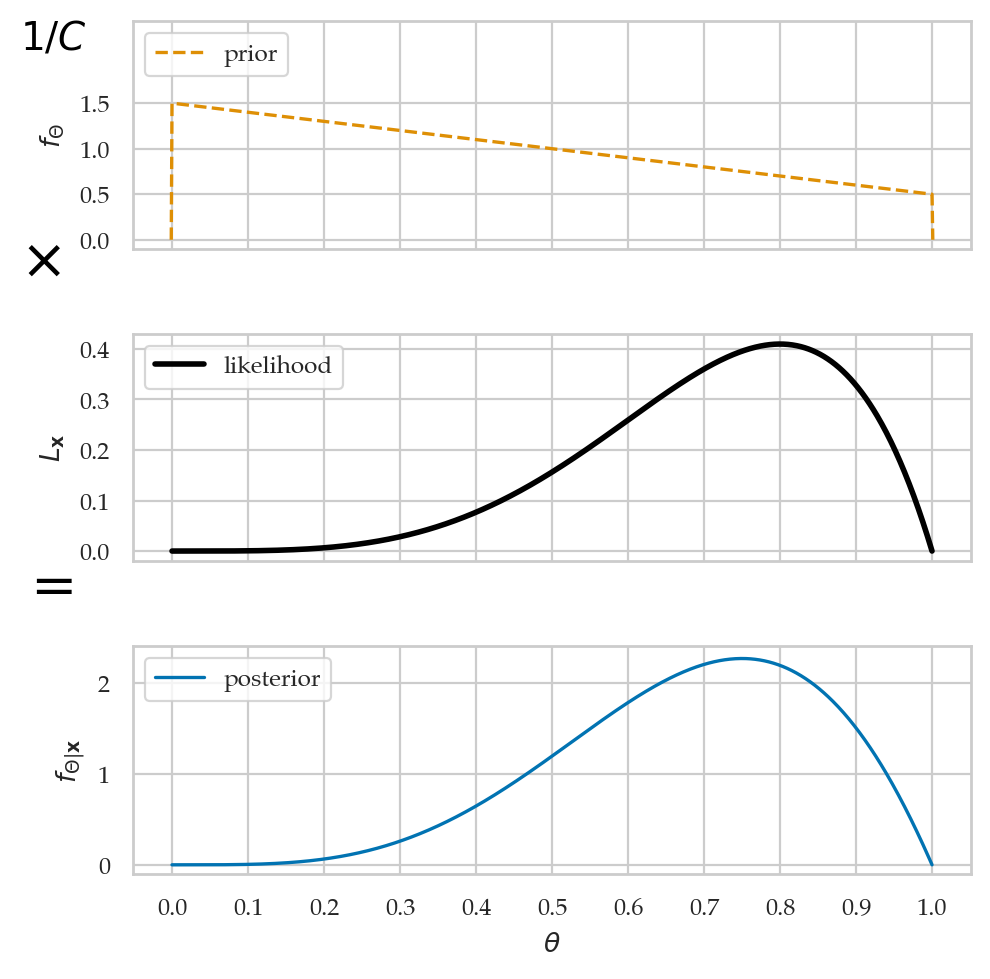

In [5]:
from ministats.plots.figures import prior_times_likelihood_eq_posterior
prior_times_likelihood_eq_posterior(heads=4, n=5, destdir=DESTDIR)

Saved figure to figures/bayes/intro/prior_times_likelihood_eq_posterior_grid.pdf
Saved figure to figures/bayes/intro/prior_times_likelihood_eq_posterior_grid.png


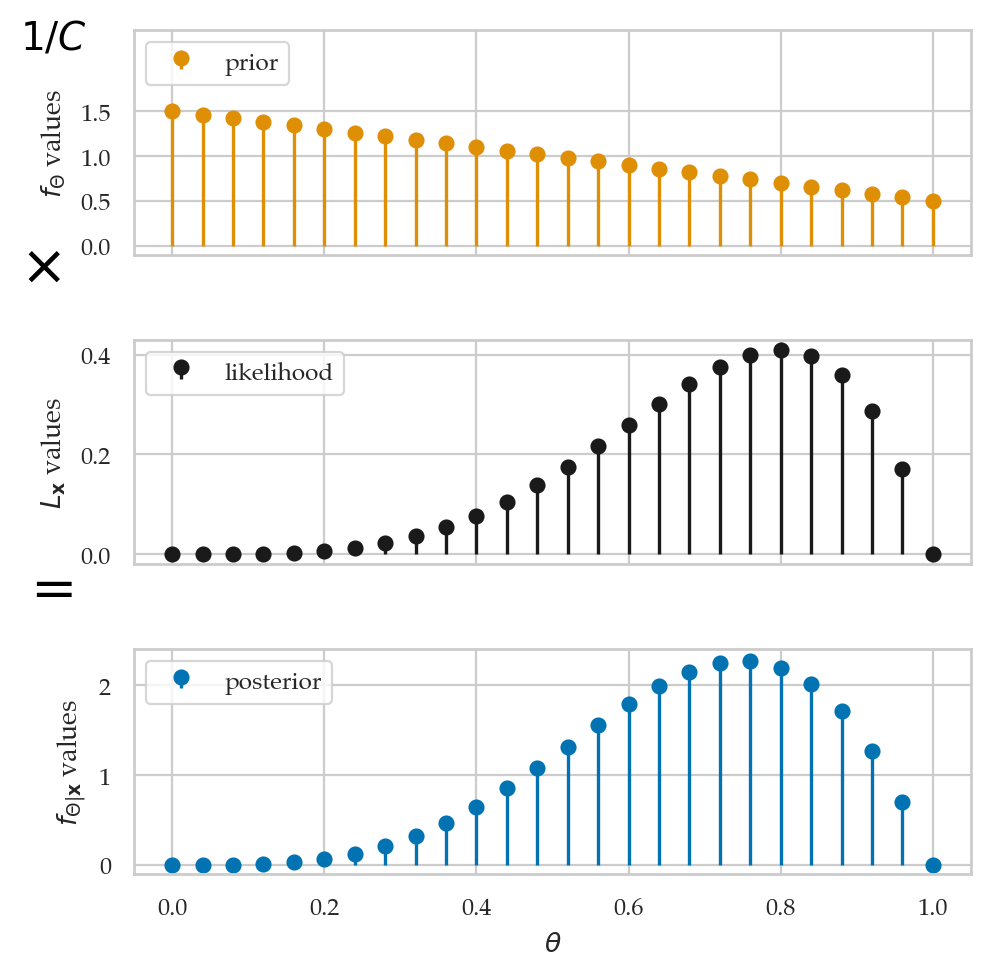

In [6]:
from ministats.plots.figures import prior_times_likelihood_eq_posterior_grid
prior_times_likelihood_eq_posterior_grid(heads=4, n=5, destdir=DESTDIR)

### Example 1: estimating the probability of a biased coin

In [7]:
ctosses = [1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,
           1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,
           0,1,0,1,0,1,0,1,1,0]

In [8]:
ngrid1 = 101             # number of points in the grid
ps = np.linspace(0, 1, ngrid1) # [0, 0.01, ..., 1.0]
ps[0:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [9]:
from scipy.stats import uniform
prior1 = uniform(0,1).pdf(ps)
prior1[0:5]

array([1., 1., 1., 1., 1.])

In [10]:
y = sum(ctosses)
n = len(ctosses)
likelihood1 = ps**y * (1-ps)**(n-y)
list(map(lambda x: float("{:1.3g}".format(x)), likelihood1[0:101:25]))  # CUTME

[0.0, 3.4e-23, 8.88e-16, 1.32e-14, 0.0]

In [11]:
numerator1 = likelihood1 * prior1
list(map(lambda x: float("{:1.3g}".format(x)), numerator1[0:101:25]))  # CUTME

[0.0, 3.4e-23, 8.88e-16, 1.32e-14, 0.0]

In [12]:
posterior1 = numerator1 / np.sum(numerator1)
list(map(lambda x: float("{:1.3g}".format(x)), posterior1[0:101:25]))

[0.0, 8.53e-11, 0.00223, 0.033, 0.0]

### Visualizing the posterior

Saved figure to figures/bayes/intro/example1_ctosses_prior_and_posterior.pdf
Saved figure to figures/bayes/intro/example1_ctosses_prior_and_posterior.png


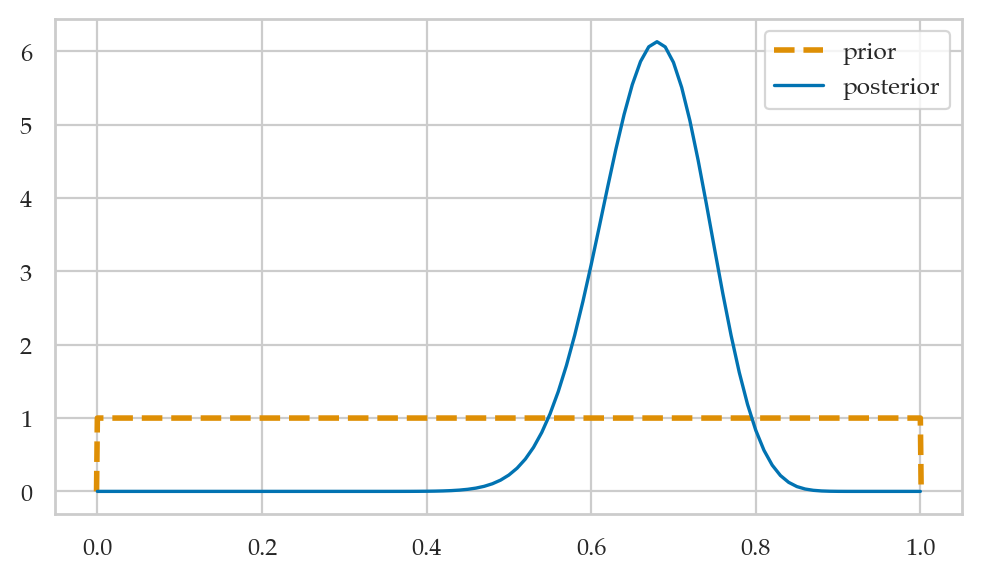

In [13]:
posterior1d = posterior1 / (ps[1] - ps[0])
psplus = [-0.001] + list(ps) + [1.001]
prior1plus = [0] + list(prior1) + [0]
sns.lineplot(x=psplus, y=prior1plus, ls="--", linewidth=2, label="prior", color="C1");
sns.lineplot(x=ps, y=posterior1d, label="posterior", color="C0")

filename = os.path.join(DESTDIR, "example1_ctosses_prior_and_posterior.pdf")
savefigure(plt.gcf(), filename)

### Visualizing the posterior updates over time

In [14]:
from ministats.plots.figures import panel_coin_posteriors
panel_coin_posteriors(destdir=DESTDIR)

Saved figure to figures/bayes/intro/panel_coin_posteriors.pdf
Saved figure to figures/bayes/intro/panel_coin_posteriors.png


### Example 2: estimating the IQ score

In [15]:
iqs = [ 82.6, 105.5,  96.7,  84.0, 127.2,  98.8,  94.3,
       122.1,  86.8,  86.1, 107.9, 118.9, 116.5, 101.0,
        91.0, 130.0, 155.7, 120.8, 107.9, 117.1, 100.1,
       108.2,  99.8, 103.6, 108.1, 110.3, 101.8, 131.7,
       103.8, 116.4]

In [16]:
ngrid2 = 1001  # number of points in the grid
mus = np.linspace(80, 120, ngrid2)
mus[0:5]

array([80.  , 80.04, 80.08, 80.12, 80.16])

In [17]:
from scipy.stats import norm

mu_M = 100
sigma_M = 40
prior2 = norm(loc=mu_M, scale=sigma_M).pdf(mus)

list(map(lambda x: float("{:1.3g}".format(x)), prior2[0:1001:300]))

[0.0088, 0.00978, 0.00992, 0.00921]

In [18]:
sigma = 15  # known population standard deviation

likelihood2 = np.ones(ngrid2)
for iq in iqs:
    likelihood_iq = norm(loc=mus, scale=sigma).pdf(iq)
    likelihood2 = likelihood2 * likelihood_iq

list(map(lambda x: float("{:1.3g}".format(x)), likelihood2[0:1001:300]))

[1.24e-77, 1.8e-62, 1.21e-55, 3.71e-57]

In [19]:
numerator2 = likelihood2 * prior2

list(map(lambda x: float("{:1.3g}".format(x)), numerator2[0:1001:300]))

[1.09e-79, 1.76e-64, 1.2e-57, 3.42e-59]

In [20]:
posterior2 = numerator2 / np.sum(numerator2)

list(map(lambda x: float("{:1.3g}".format(x)), posterior2[0:1001:300]))

[2.03e-25, 3.29e-10, 0.00224, 6.37e-05]

### Visualizing the posterior

In [21]:
posterior2d = posterior2 / (mus[1] - mus[0])
sns.lineplot(x=mus, y=posterior2d, label="posterior")
sns.lineplot(x=mus, y=prior2, ls="--", linewidth=2, label="prior");
filename = os.path.join(DESTDIR, "example2_iq_prior_and_posterior.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/intro/example2_iq_prior_and_posterior.pdf
Saved figure to figures/bayes/intro/example2_iq_prior_and_posterior.png


In [22]:
# TODO: replace this with new code from `ministats.book.figures`

from ministats import plot_pdf

priors = [
    norm(loc=100, scale=40),
    # varying mu_M
    norm(loc=80,  scale=40),
    norm(loc=50,  scale=40),
    norm(loc=0,   scale=40),
    # varying sigma_M
    norm(loc=100, scale=30),
    norm(loc=100, scale=20),
    norm(loc=100, scale=10),
    norm(loc=100, scale=5),
    norm(loc=100, scale=3),
    norm(loc=100, scale=1),
]

def get_label(prior):
    mu = str(prior.kwds["loc"])
    sigma = str(prior.kwds["scale"])
    return r"$\mathcal{N}(" + mu + "," + sigma + ")$"


linestyles = ["dashed", "dotted", "dashdot", (5, (10, 3))]
xlims = [80,120]

with plt.rc_context({"figure.figsize":(6.5,2.6)}):
    fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    for prior, ls in zip(priors[4:7], linestyles):
        plot_pdf(prior, ax=ax1, ls=ls, color="C1", xlims=xlims, label=get_label(prior))
    for prior, ls in zip(priors[7:], linestyles):
        plot_pdf(prior, ax=ax2, ls=ls, color="C1", xlims=xlims, label=get_label(prior))
    ax1.set_ylim(-0.003, 0.14)
    ax1.set_xlabel(r"$\mu$")
    ax1.set_ylabel(r"$f_M$")
    ax1.set_title("(a) Diffuse priors")
    ax2.set_xlabel(r"$\mu$")
    ax2.set_title("(b) Concentrated priors")

    # FIGURES ONLY
    filename = os.path.join(DESTDIR, "different_priors_for_example2.pdf")
    savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/intro/different_priors_for_example2.pdf
Saved figure to figures/bayes/intro/different_priors_for_example2.png


### Bayesian hypothesis testing

In [23]:
import bambi as bmb
iqs = pd.DataFrame({"iq":iqs})
priors2 = {
    "Intercept": bmb.Prior("Normal", mu=100, sigma=40),
    "sigma": 15,
}
mod2 = bmb.Model(formula="iq ~ 1",
                 family="gaussian",
                 link="identity",
                 priors=priors2,
                 data=iqs)
mod2.set_alias({"Intercept": "M"})
idata2 = mod2.fit(draws=2000, random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [M]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


In [24]:
import arviz as az

with plt.rc_context({"figure.figsize":(5,1.9)}):
    ax = az.plot_posterior(idata2, hdi_prob=0.95, point_estimate=None);
    ax.axvline(100, c="C2", lw=2)
    ax.set_xlabel(None)
    ax.set_title(None)
    ax.set_xticks([100,105,110,115])
    filename = os.path.join(DESTDIR, "hypothesis_test_hdi.pdf")
    savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/intro/hypothesis_test_hdi.pdf
Saved figure to figures/bayes/intro/hypothesis_test_hdi.png


Saved figure to figures/bayes/intro/hypothesis_test_rope.pdf
Saved figure to figures/bayes/intro/hypothesis_test_rope.png


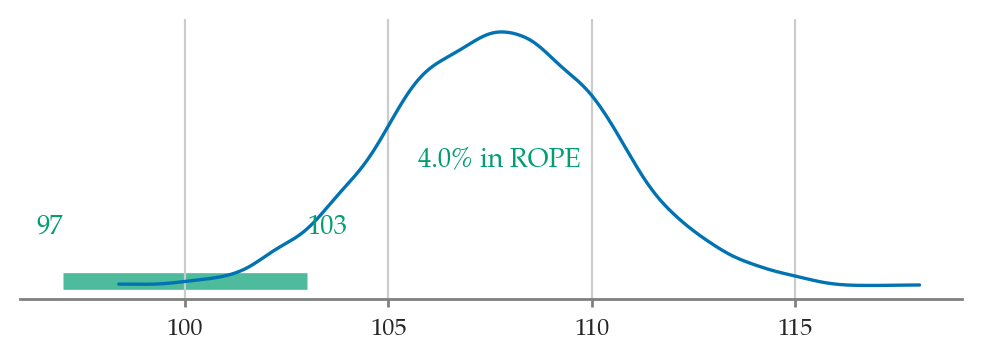

In [25]:
with plt.rc_context({"figure.figsize":(5,1.9)}):
    ax = az.plot_posterior(idata2, hdi_prob="hide", point_estimate=None, rope=[97,103])
    ax.set_xlabel(None)
    ax.set_title(None)
    ax.set_xticks([100,105,110,115])
    filename = os.path.join(DESTDIR, "hypothesis_test_rope.pdf")
    savefigure(plt.gcf(), filename)

## Section 5.2 — Bayesian inference computations


In [26]:
DESTDIR = "figures/bayes/computations"

### Example 1: estimating the probability of a bias of a coin

In [27]:
ctosses = [1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,
           1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,
           0,1,0,1,0,1,0,1,1,0]
ctosses = pd.DataFrame({"ctoss":ctosses})

In [28]:
DESTDIR = "figures/bayes/computations"

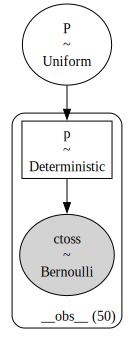

In [29]:
import bambi as bmb

priors1 = {
    "Intercept": bmb.Prior("Uniform", lower=0, upper=1)
}

mod1 = bmb.Model(formula="ctoss ~ 1",
                 family="bernoulli",
                 link="identity",
                 priors=priors1,
                 data=ctosses)
mod1.set_alias({"Intercept": "P"})

mod1.build()
filename = os.path.join(DESTDIR, "example1_mod1_graph")
mod1.graph(name=filename, fmt="png", dpi=300)

In [30]:
idata1 = mod1.fit(random_seed=42)

Modeling the probability that ctoss==1
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [P]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


In [31]:
postP = idata1["posterior"]["P"].values.flatten()

with plt.rc_context({"figure.figsize":(5.7,2)}):
    fig, axs = plt.subplots(1, 2, sharey=True)

    sns.histplot(x=postP, stat="density", ax=axs[0])
    axs[0].set_xlabel("$p$")
    axs[0].set_ylabel("$f_{P|\\mathbf{c}}$");
    axs[0].set_title("(a) Histogram of the posterior density")

    sns.kdeplot(x=postP, ax=axs[1])
    axs[1].set_xlabel("$p$")
    axs[1].set_title("(b) Kernel density plot of the posterior")
    
    filename = os.path.join(DESTDIR, "example1_histplot_and_kdeplot_postP.pdf")
    savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/computations/example1_histplot_and_kdeplot_postP.pdf
Saved figure to figures/bayes/computations/example1_histplot_and_kdeplot_postP.png


### Example 2: estimating the IQ score

In [32]:
iqs = [ 82.6, 105.5,  96.7,  84.0, 127.2,  98.8,  94.3,
       122.1,  86.8,  86.1, 107.9, 118.9, 116.5, 101.0,
        91.0, 130.0, 155.7, 120.8, 107.9, 117.1, 100.1,
       108.2,  99.8, 103.6, 108.1, 110.3, 101.8, 131.7,
       103.8, 116.4]
iqs = pd.DataFrame({"iq":iqs})

In [33]:
import bambi as bmb

priors2 = {
    "Intercept": bmb.Prior("Normal", mu=100, sigma=40),
    "sigma": 15,
}

mod2 = bmb.Model(formula="iq ~ 1",
                 family="gaussian",
                 link="identity",
                 priors=priors2,
                 data=iqs)

mod2.set_alias({"Intercept": "M"})
mod2.build()
filename = os.path.join(DESTDIR, "example2_mod2_graph")
mod2.graph(name=filename, fmt="png", dpi=300)

In [34]:
idata2 = mod2.fit(draws=2000, random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [M]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 0 seconds.


Saved figure to figures/bayes/computations/example2_histplot_and_kdeplot_postM.pdf
Saved figure to figures/bayes/computations/example2_histplot_and_kdeplot_postM.png


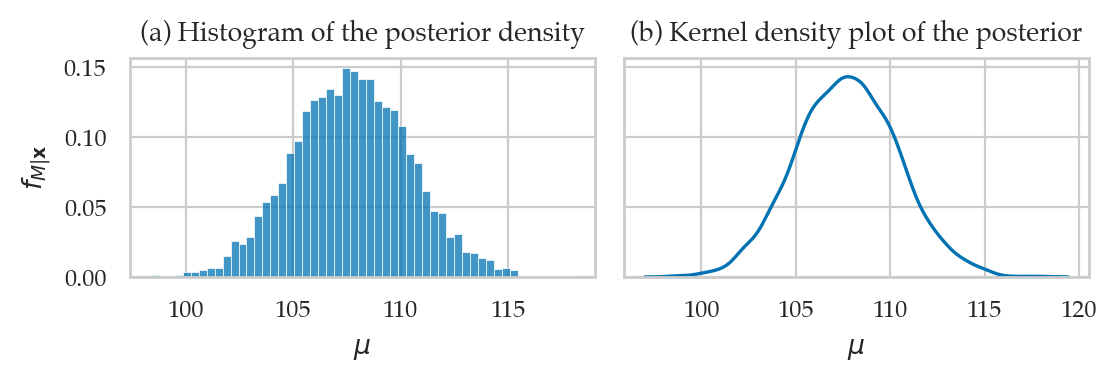

In [35]:
postM = idata2["posterior"]["M"].values.flatten()

with plt.rc_context({"figure.figsize":(5.7,2)}):
    fig, axs = plt.subplots(1, 2, sharey=True)

    sns.histplot(x=postM, stat="density", ax=axs[0])
    axs[0].set_xlabel("$\\mu$")
    axs[0].set_ylabel("$f_{M|\\mathbf{x}}$");
    axs[0].set_title("(a) Histogram of the posterior density")

    sns.kdeplot(x=postM, ax=axs[1])
    axs[1].set_xlabel("$\\mu$")
    axs[1].set_title("(b) Kernel density plot of the posterior")
    
    filename = os.path.join(DESTDIR, "example2_histplot_and_kdeplot_postM.pdf")
    savefigure(plt.gcf(), filename)

### Visualizing and interpreting posteriors

In [36]:
import arviz as az

In [37]:
az.plot_posterior(idata1, var_names="P", hdi_prob=0.9, round_to=3);
filename = os.path.join(DESTDIR, "example1_arviz_plot_posterior.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/computations/example1_arviz_plot_posterior.pdf
Saved figure to figures/bayes/computations/example1_arviz_plot_posterior.png


Saved figure to figures/bayes/computations/example1_arviz_plot_forest.pdf
Saved figure to figures/bayes/computations/example1_arviz_plot_forest.png


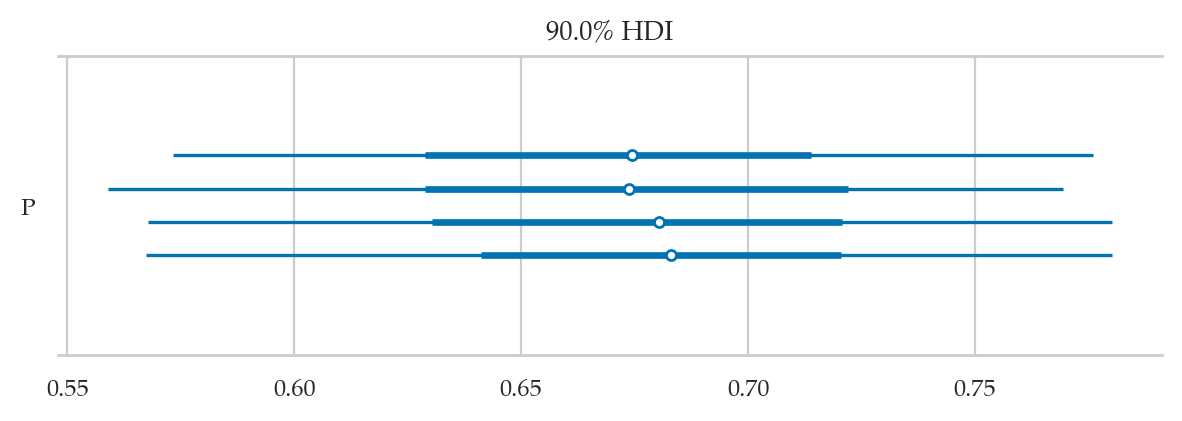

In [38]:
# FIGURES ONLY
az.plot_forest(idata1, hdi_prob=0.9, figsize=(6,2.2));
filename = os.path.join(DESTDIR, "example1_arviz_plot_forest.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/computations/example2_arviz_plot_posterior.pdf
Saved figure to figures/bayes/computations/example2_arviz_plot_posterior.png


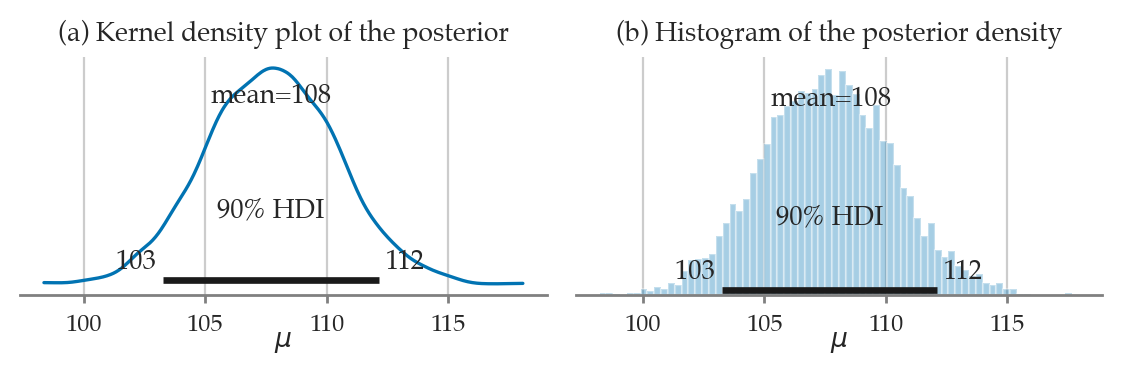

In [39]:
with plt.rc_context({"figure.figsize":(5.7,2)}):
    fig, axs = plt.subplots(1,2)
    az.plot_posterior(idata2, var_names="M", hdi_prob=0.9, ax=axs[0]);

    axs[0].set_title("(a) Kernel density plot of the posterior")
    axs[0].set_xlabel("$\\mu$")
    axs[0].xaxis.set_label_coords(0.5, -0.13)

    az.plot_posterior(idata2, var_names="M", hdi_prob=0.9, kind="hist", bins=70, ax=axs[1]);
    axs[1].set_title("(b) Histogram of the posterior density")
    axs[1].set_xlabel("$\\mu$")
    axs[1].xaxis.set_label_coords(0.5, -0.13)

    filename = os.path.join(DESTDIR, "example2_arviz_plot_posterior.pdf")
    savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/computations/example2_arviz_plot_forest.pdf
Saved figure to figures/bayes/computations/example2_arviz_plot_forest.png


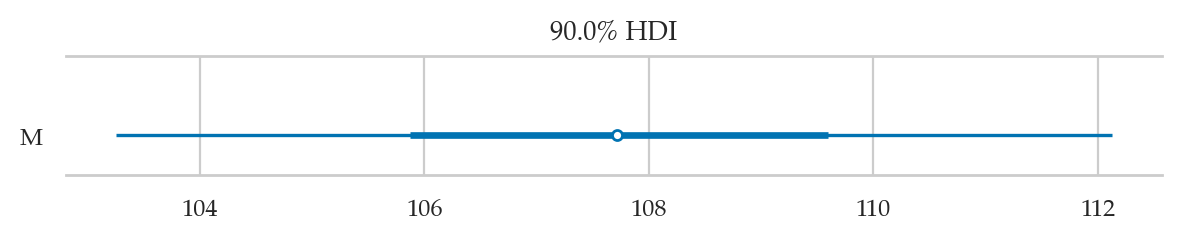

In [40]:
az.plot_forest(idata2, hdi_prob=0.9, combined=True, figsize=(6,1.3))
filename = os.path.join(DESTDIR, "example2_arviz_plot_forest.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/computations/example2_arviz_plot_hypothesis_test_hdi_and_rope.pdf
Saved figure to figures/bayes/computations/example2_arviz_plot_hypothesis_test_hdi_and_rope.png


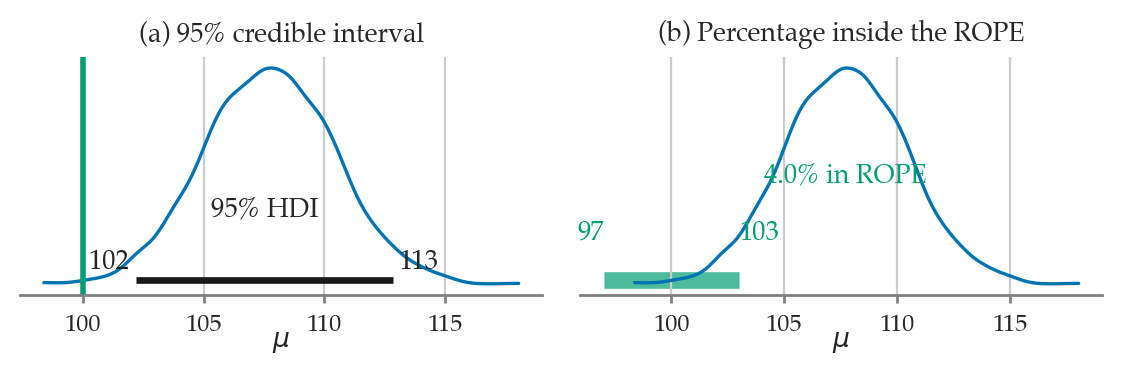

In [41]:
with plt.rc_context({"figure.figsize":(5.7,2)}):
    fig, axs = plt.subplots(1,2)
    az.plot_posterior(idata2, hdi_prob=0.95, point_estimate=None, ax=axs[0]);
    axs[0].axvline(100, c="C2", lw=2)
    axs[0].set_title("(a) 95% credible interval")
    axs[0].set_xlabel("$\\mu$")
    axs[0].xaxis.set_label_coords(0.5, -0.13)
    az.plot_posterior(idata2, hdi_prob="hide", point_estimate=None, rope=[97,103], ax=axs[1]);
    axs[1].set_title("(b) Percentage inside the ROPE")
    axs[1].set_xlabel("$\\mu$")
    axs[1].xaxis.set_label_coords(0.5, -0.13)
    filename = os.path.join(DESTDIR, "example2_arviz_plot_hypothesis_test_hdi_and_rope.pdf")
    savefigure(plt.gcf(), filename)

### Explanations

#### Visualizing prior distributions


Sampling: [M]


Saved figure to figures/bayes/computations/example2_mod2_plot_priors.pdf
Saved figure to figures/bayes/computations/example2_mod2_plot_priors.png


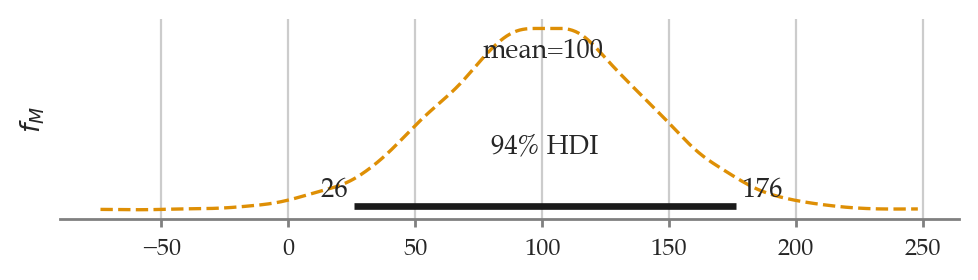

In [42]:
# FIGURES ONLY
with plt.rc_context({"figure.figsize":(5,1.5)}):
    ax = mod2.plot_priors(random_seed=43, color="C1", linestyle="dashed")
    ax.set_title(None)
    # ax.set_xlabel("$\\mu$")
    ax.set_xlabel(None)
    ax.set_ylabel("$f_{M}$")
    
    filename = os.path.join(DESTDIR, "example2_mod2_plot_priors.pdf")
    savefigure(plt.gcf(), filename)

#### MCMC diagnostics


Saved figure to figures/bayes/computations/example2_diagnostics_trace.pdf
Saved figure to figures/bayes/computations/example2_diagnostics_trace.png


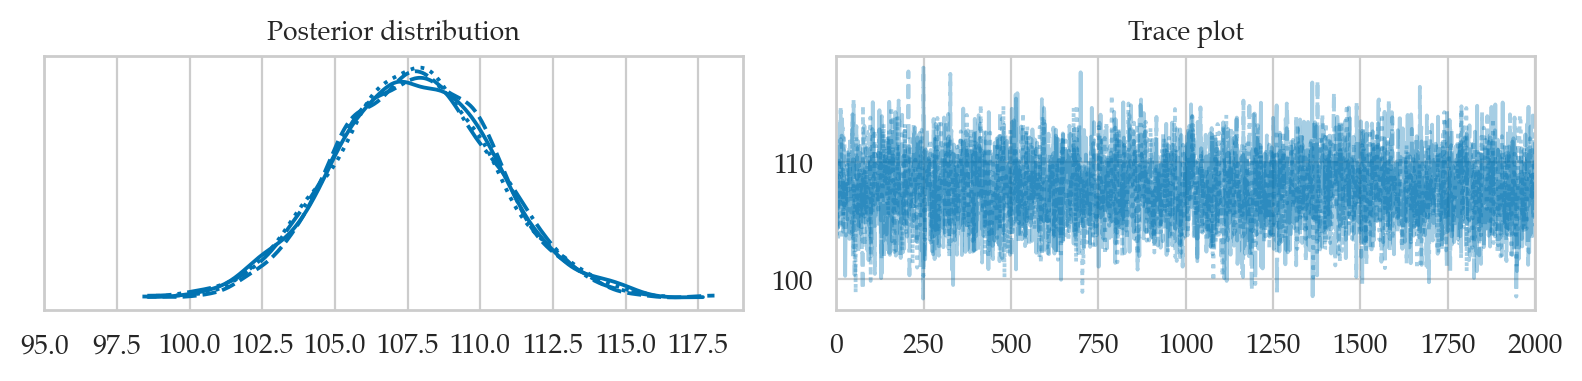

In [43]:
axs = az.plot_trace(idata2, figsize=(8,2))
ax1, ax2 = axs[0,0], axs[0,1]
#
ax1.set_title("Posterior distribution")
ax1.set_xlabel(None)
ax1.set_xticks(np.arange(95,120,2.5))
# 
ax2.set_title("Trace plot")
ax2.set_xticks(np.arange(0,2001,250))
#
filename = os.path.join(DESTDIR, "example2_diagnostics_trace.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/computations/example2_diagnostics_rank.pdf
Saved figure to figures/bayes/computations/example2_diagnostics_rank.png


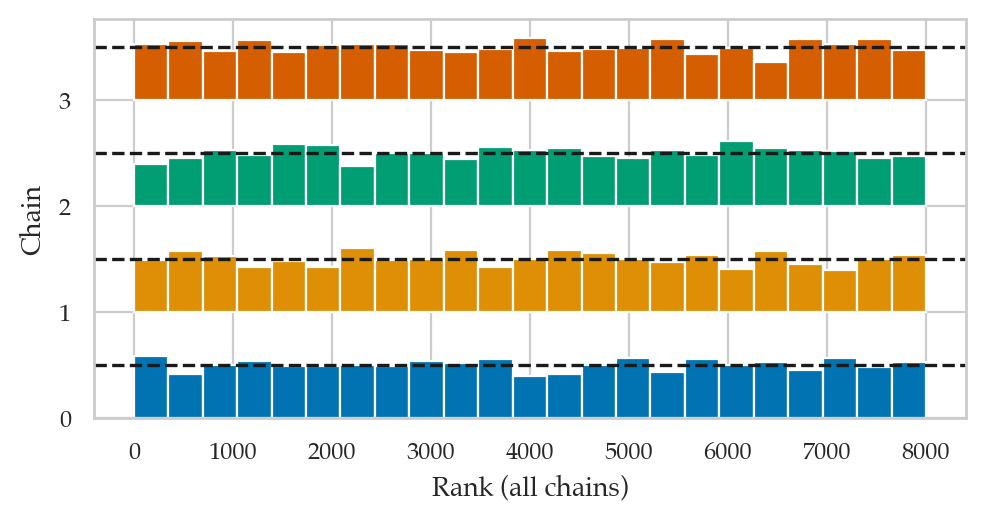

In [44]:
with plt.rc_context({"figure.figsize":(5,2.7)}):
    ax = az.plot_rank(idata2)
    ax.set_title(None)
    filename = os.path.join(DESTDIR, "example2_diagnostics_rank.pdf")
    savefigure(plt.gcf(), filename)

### Bayesian workflow

#### Prior predictive checks

Sampling: [M, iq]


Saved figure to figures/bayes/computations/example2_prior_predictive_checks.pdf
Saved figure to figures/bayes/computations/example2_prior_predictive_checks.png


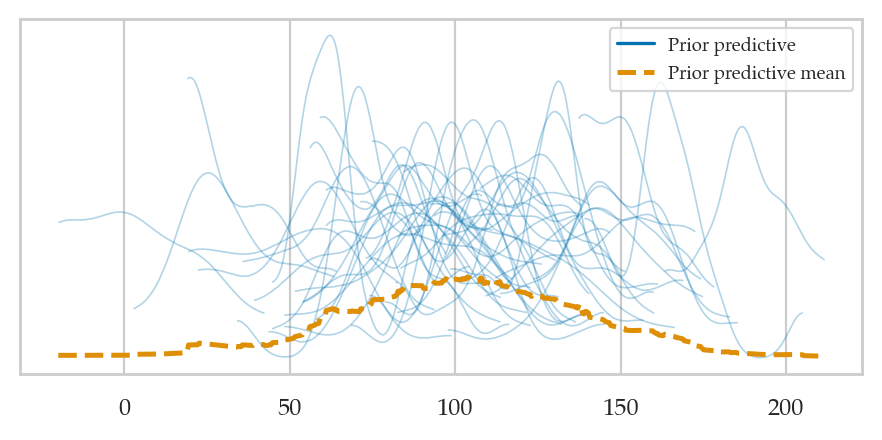

In [45]:
idata2_pri = mod2.prior_predictive(draws=50, random_seed=45)

with plt.rc_context({"figure.figsize":(4.5,2.3)}):
    ax = az.plot_ppc(idata2_pri, group="prior", alpha=0.3);
    ax.set_xlabel(None)
    filename = os.path.join(DESTDIR, "example2_prior_predictive_checks.pdf")
    savefigure(plt.gcf(), filename)

#### Posterior predictive checks

Sampling: [iq]


Output()

Saved figure to figures/bayes/computations/example2_posterior_predictive_checks.pdf
Saved figure to figures/bayes/computations/example2_posterior_predictive_checks.png


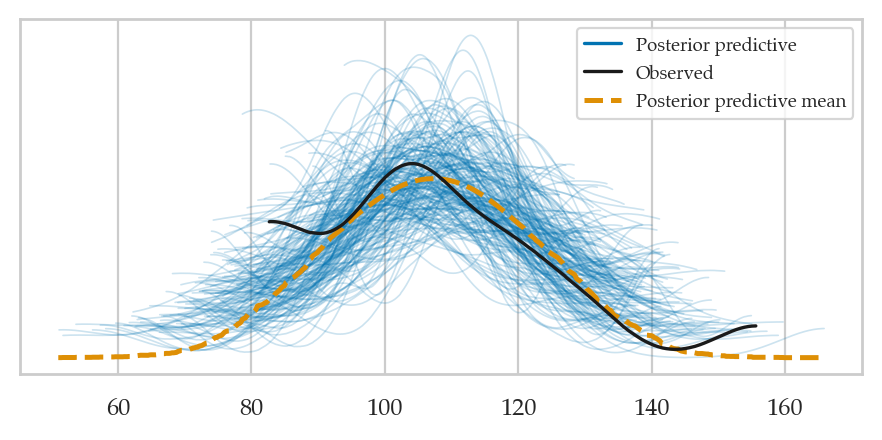

In [46]:
# FIGURES ONLY
import pymc as pm

np.random.seed(42)
selected_draws = np.random.choice(idata2["posterior"]["draw"].values, 50, replace=False)
idata2_rep = idata2.sel(draw=selected_draws)


# Sample from posterior predictive using a fixed seed to ensure repeatability 
with mod2.backend.model:
    idata2_rep = pm.sample_posterior_predictive(idata2_rep, random_seed=57)

# plot
with plt.rc_context({"figure.figsize":(4.5,2.3)}):
    ax = az.plot_ppc(idata2_rep, group="posterior", random_seed=45);
    ax.set_xlabel(None)
    filename = os.path.join(DESTDIR, "example2_posterior_predictive_checks.pdf")
    savefigure(plt.gcf(), filename)

#### Fitting model to synthetic data

In [47]:
np.random.seed(46)
from scipy.stats import norm
fakeiqs = norm(loc=110, scale=15).rvs(30)
fakeiqs = pd.DataFrame({"iq":fakeiqs})
fakeiqs["iq"].mean()

np.float64(109.7132680142492)

In [48]:
#######################################################
mod2f = bmb.Model(formula="iq ~ 1", family="gaussian",
                  priors=priors2, data=fakeiqs)
mod2f.set_alias({"Intercept": "M"})
idata2f = mod2f.fit(random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [M]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


Saved figure to figures/bayes/computations/example2_mod2f_synthetic_data_posterior.pdf
Saved figure to figures/bayes/computations/example2_mod2f_synthetic_data_posterior.png


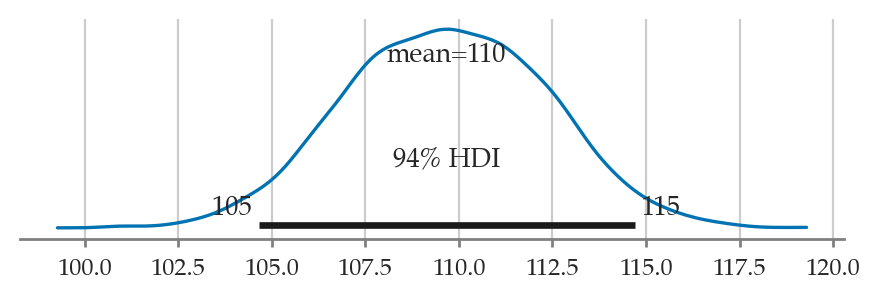

In [49]:
with plt.rc_context({"figure.figsize":(4.5,1.6)}):
    ax = az.plot_posterior(idata2f)
    ax.set_title(None)
    filename = os.path.join(DESTDIR, "example2_mod2f_synthetic_data_posterior.pdf")
    savefigure(plt.gcf(), filename)

## Section 5.3 — Bayesian linear models

In [50]:
DESTDIR = "figures/bayes/linear"

### Example 1: students score as a function of effort

Saved figure to figures/bayes/linear/example1_posterior.pdf
Saved figure to figures/bayes/linear/example1_posterior.png


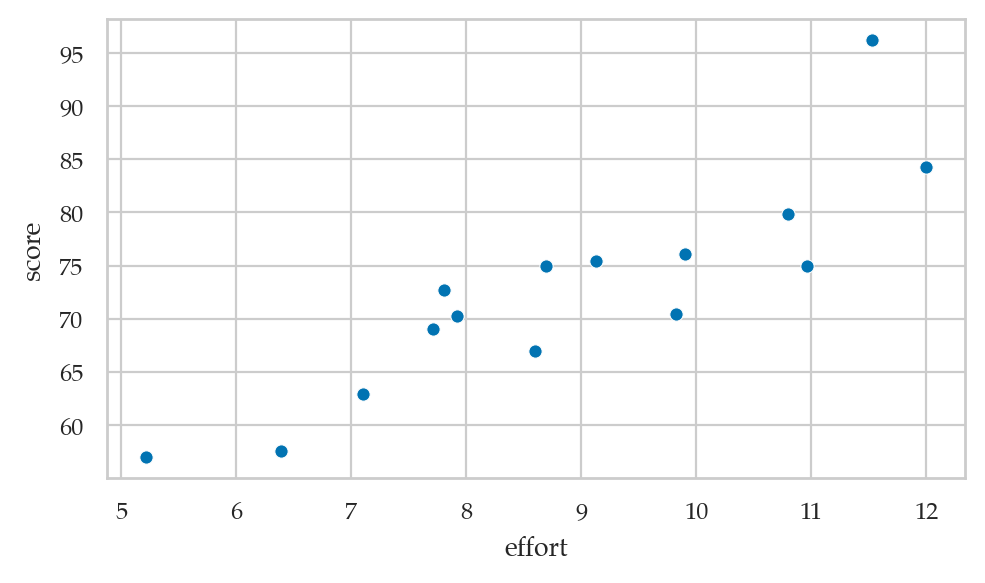

In [51]:
students = pd.read_csv("../datasets/students.csv")

sns.scatterplot(x="effort", y="score", data=students);

filename = os.path.join(DESTDIR, "example1_posterior.pdf")
savefigure(plt.gcf(), filename)

In [52]:
import bambi as bmb

priors1 = {
    "Intercept": bmb.Prior("Normal", mu=70, sigma=20),
    "effort": bmb.Prior("Normal", mu=0, sigma=10),
    "sigma": bmb.Prior("HalfStudentT", nu=4, sigma=10),
}

mod1 = bmb.Model("score ~ 1 + effort",
                 family="gaussian",
                 link="identity",
                 priors=priors1,
                 data=students)

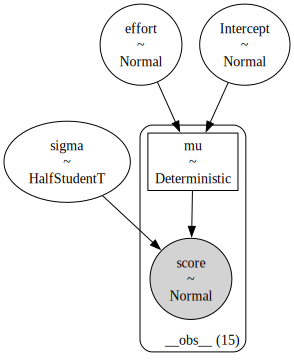

In [53]:
mod1.build()
filename = os.path.join(DESTDIR, "example1_students_mod1_graph")
mod1.graph(name=filename, fmt="png", dpi=300)

In [54]:
idata1 = mod1.fit(random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, effort]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Saved figure to figures/bayes/linear/example1_students_posterior.pdf
Saved figure to figures/bayes/linear/example1_students_posterior.png


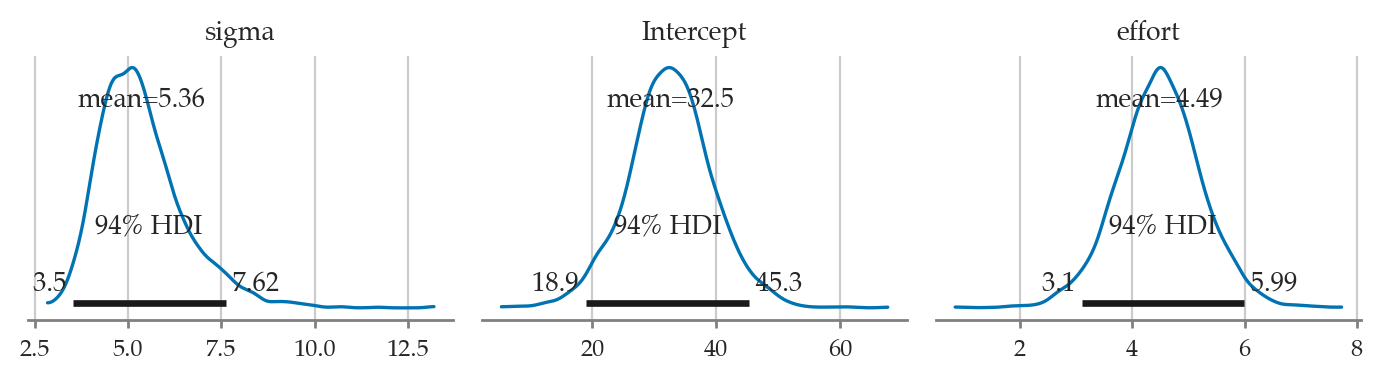

In [55]:
import arviz as az

az.plot_posterior(idata1, round_to=3, figsize=(7,2));
filename = os.path.join(DESTDIR, "example1_students_posterior.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/linear/example1_plot_predictions_scatter.pdf
Saved figure to figures/bayes/linear/example1_plot_predictions_scatter.png


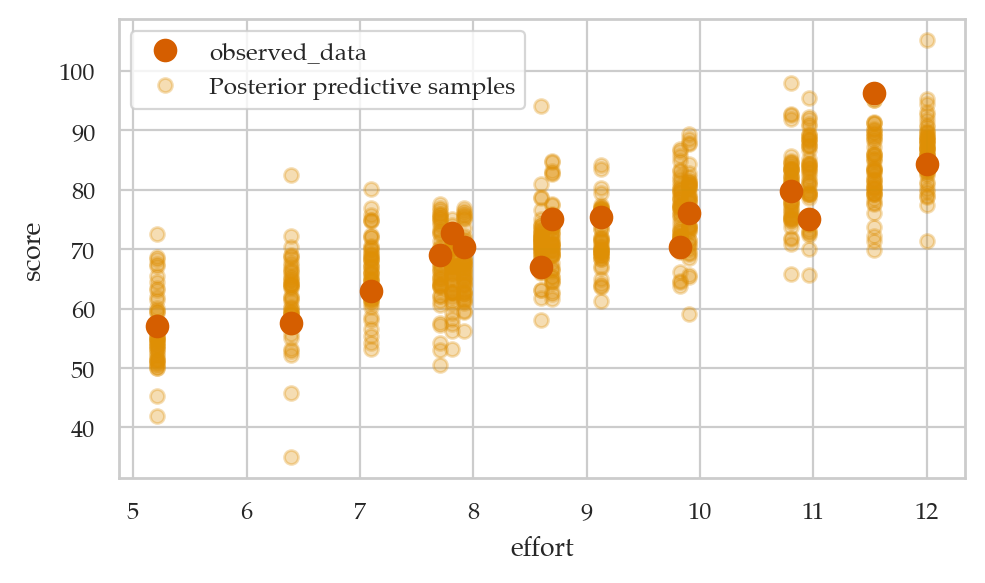

In [56]:
preds1 = mod1.predict(idata=idata1, data=students,
                      kind="response", inplace=False)
efforts = students["effort"]
az.plot_lm(y="score", idata=preds1, x=efforts,
           y_model="mu", y_hat="score",
           kind_pp="samples", kind_model="lines");

filename = os.path.join(DESTDIR, "example1_plot_predictions_scatter.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/linear/example1_plot_predictions.pdf
Saved figure to figures/bayes/linear/example1_plot_predictions.png


/Users/ivan/Projects/Minireference/STATSbook/noBSstats/venv/lib/python3.12/site-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


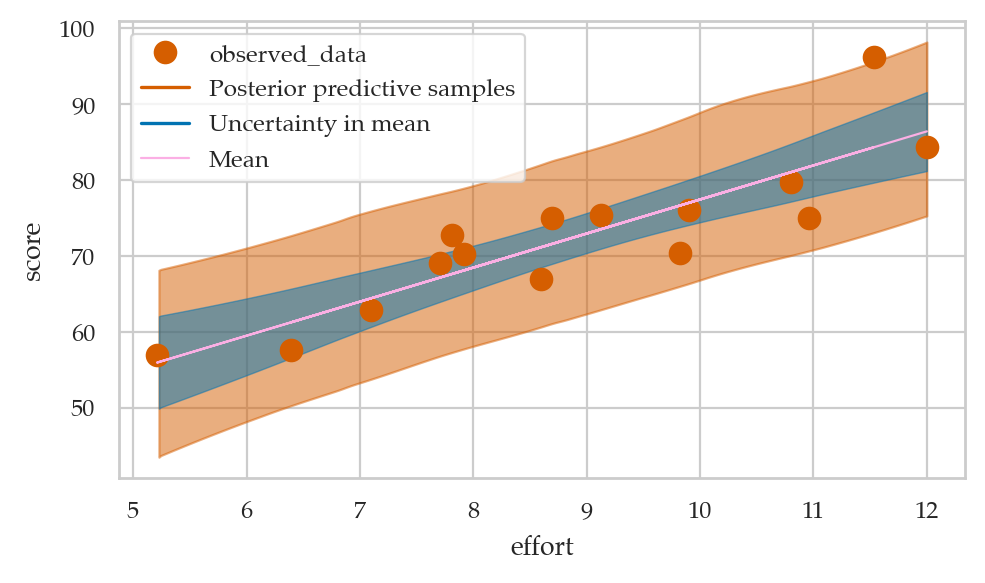

In [57]:
az.plot_lm(y="score", idata=preds1, x=efforts,
           y_model="mu", y_hat="score",
           kind_pp="hdi", kind_model="hdi");

filename = os.path.join(DESTDIR, "example1_plot_predictions.pdf")
savefigure(plt.gcf(), filename)

### Example 2: doctors sleep scores

In [58]:
doctors = pd.read_csv("../datasets/doctors.csv")

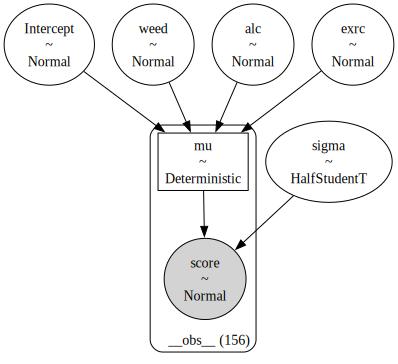

In [59]:
priors2 = {
    "Intercept": bmb.Prior("Normal", mu=50, sigma=40),
    # we'll set the priors for the slopes below
    "sigma": bmb.Prior("HalfStudentT", nu=4, sigma=20),
}

mod2 = bmb.Model("score ~ 1 + alc + weed + exrc",
                 family="gaussian",
                 link="identity",
                 priors=priors2,
                 data=doctors)

# set the same prior for all slopes using `set_priors`
slope_prior = bmb.Prior("Normal", mu=0, sigma=10)
mod2.set_priors(common=slope_prior)

mod2.build()

filename = os.path.join(DESTDIR, "example2_doctors_mod2_graph")
mod2.graph(name=filename, fmt="png", dpi=300)

In [60]:
idata2 = mod2.fit(random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, alc, weed, exrc]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Saved figure to figures/bayes/linear/example2_posterior.pdf
Saved figure to figures/bayes/linear/example2_posterior.png


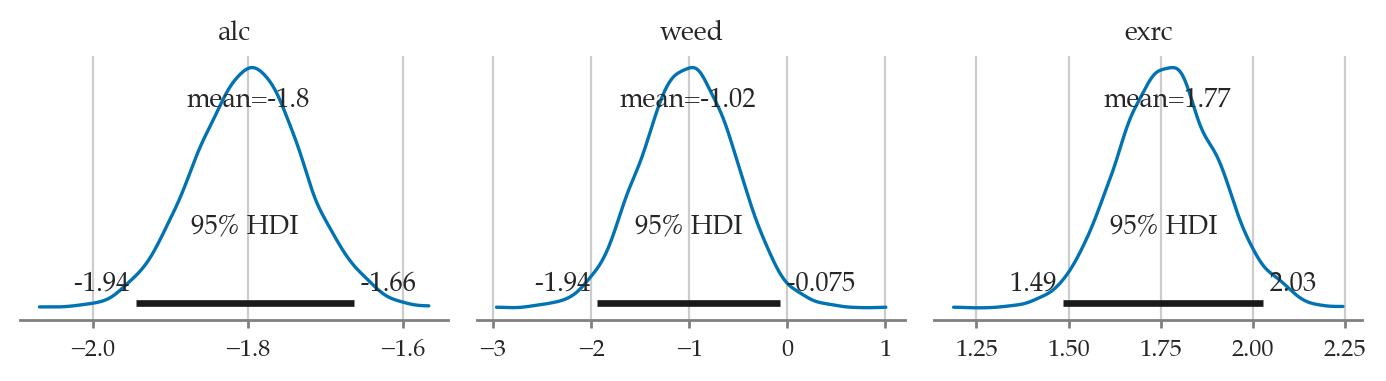

In [61]:
az.plot_posterior(idata2, var_names=["alc", "weed", "exrc"],
                  round_to=3,
                  hdi_prob=0.95, figsize=(7,2));
filename = os.path.join(DESTDIR, "example2_posterior.pdf")
savefigure(plt.gcf(), filename)

### Example 3: Bayesian logistic regression


In [62]:
interns = pd.read_csv("../datasets/interns.csv")

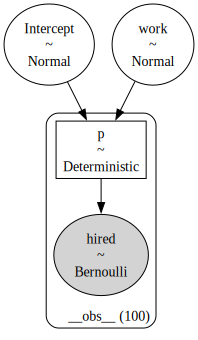

In [63]:
priors3 = {
    "Intercept": bmb.Prior("Normal", mu=0, sigma=20),
    "work": bmb.Prior("Normal", mu=2, sigma=2),
}

mod3 = bmb.Model("hired ~ 1 + work",
                 family="bernoulli",
                 link="logit",
                 priors=priors3,
                 data=interns)

mod3.build()
filename = os.path.join(DESTDIR, "example3_interns_mod3_graph")
mod3.graph(name=filename, fmt="png", dpi=300)

In [64]:
idata3 = mod3.fit(random_seed=42)

Modeling the probability that hired==1
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, work]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Saved figure to figures/bayes/linear/example3_posterior.pdf
Saved figure to figures/bayes/linear/example3_posterior.png


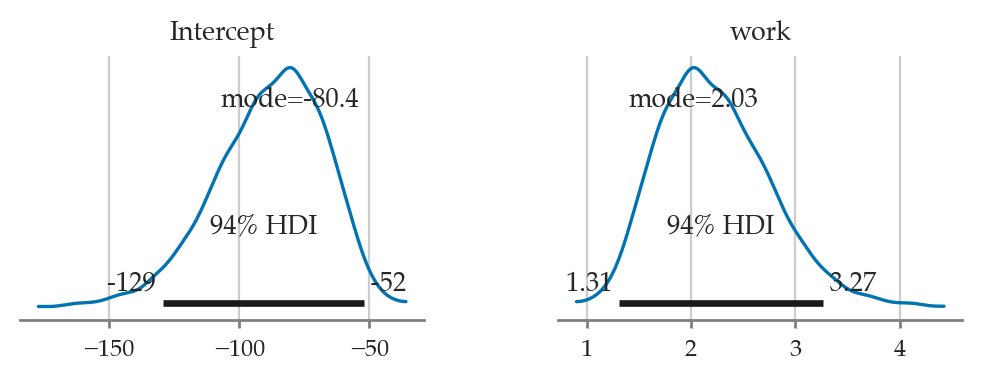

In [65]:
az.plot_posterior(idata3, round_to=3, point_estimate="mode", figsize=(5,2));
filename = os.path.join(DESTDIR, "example3_posterior.pdf")
savefigure(plt.gcf(), filename, tight_layout_kwargs={"w_pad":5})

MAP estimates: -80.4 2.03
Saved figure to figures/bayes/linear/example3_predictions.pdf
Saved figure to figures/bayes/linear/example3_predictions.png


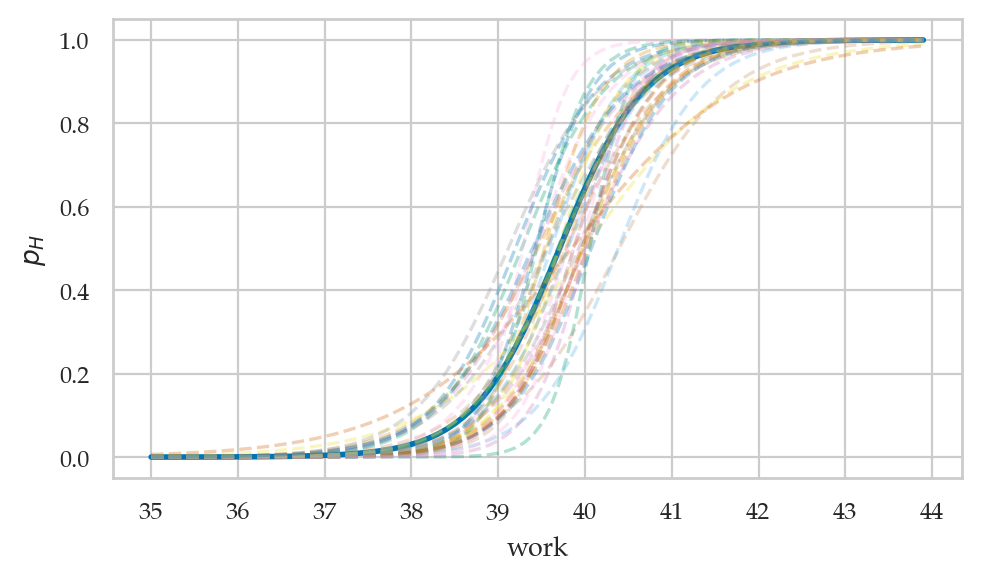

In [66]:
from scipy.special import expit

# generate predictions
works = np.arange(35, 44, 0.1)
new_interns = pd.DataFrame({"work": works})
idata3_pred = mod3.predict(idata3, data=new_interns, inplace=False)

# plot best-fit curve based on MAP estimates
intercepts = idata3["posterior"]['Intercept'].values
wslopes = idata3["posterior"]['work'].values
B0_MAP = az.plots.plot_utils.calculate_point_estimate('mode', intercepts)
Bw_MAP = az.plots.plot_utils.calculate_point_estimate('mode', wslopes)
print("MAP estimates:", B0_MAP.round(1), Bw_MAP.round(2))
p_MAP = expit(B0_MAP + Bw_MAP*works)
ax = sns.lineplot(x=works, y=p_MAP, lw=2)

# plot 40 samples
subset = np.random.choice(1000, 10, replace=False)
post3 = idata3_pred["posterior"]
post3_subset = post3.sel(draw=subset)
for ps in az.extract(post3_subset, var_names="p").T:
    sns.lineplot(x=works, y=ps, alpha=0.3, ax=ax, ls="--")
ax.set_xlabel("work")
ax.set_ylabel("$p_H$")
ax.set_xticks(range(35,44+1));

# FIGURES ONLY
filename = os.path.join(DESTDIR, "example3_predictions.pdf")
savefigure(ax, filename)

## Section 5.4 — Bayesian difference between means

In [67]:
DESTDIR = "figures/bayes/dmeans"

### Choosing priors for log-sigma

#### Normal distribution for log-sigma


Saved figure to figures/bayes/dmeans/log_sigma_normal_examples.pdf
Saved figure to figures/bayes/dmeans/log_sigma_normal_examples.png


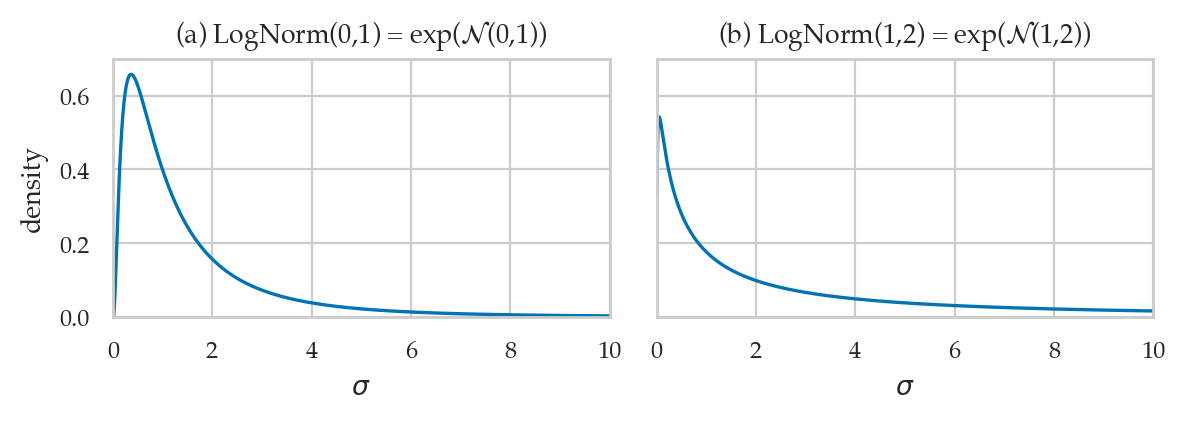

In [68]:
# FIGURES ONLY
from scipy.stats import norm

def get_lognormal(mu=0, sigma=1):
    logsigs = np.linspace(-5, 5, 1000)
    dlogsigs = norm(mu, sigma).pdf(logsigs)
    sigmas = np.exp(logsigs)
    # Apply the change of variables to get the density for sigma
    # based on the Jacobian |d(log(sigma))/d(sigma)| = 1/sigma
    dsigmas = dlogsigs / sigmas
    return sigmas, dsigmas


with plt.rc_context({"figure.figsize":(6,2.2)}):
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

    # PLOT 1
    mu, sigma = 0, 1
    sigmas, dsigmas = get_lognormal(mu, sigma)
    sns.lineplot(x=sigmas, y=dsigmas, ax=ax1)
    ax1.set_xlabel('$\\sigma$')
    ax1.set_ylabel('density')
    ax1.set_title(f'(a) LogNorm({mu},{sigma}) = exp($\\mathcal{{N}}$({mu},{sigma}))')
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 0.7)

    # PLOT 2
    mu, sigma = 1, 2
    sigmas, dsigmas = get_lognormal(mu, sigma)
    sns.lineplot(x=sigmas, y=dsigmas, ax=ax2)
    ax2.set_xlabel('$\\sigma$')
    ax2.set_ylabel('density')
    ax2.set_title(f'(b) LogNorm({mu},{sigma}) = exp($\\mathcal{{N}}$({mu},{sigma}))')
    ax2.set_xlim(0, 10)

    filename = os.path.join(DESTDIR, "log_sigma_normal_examples.pdf")
    savefigure(fig, filename)

#### Choosing priors for the degrees of freedom parameter

Saved figure to figures/bayes/dmeans/gamma_and_exp_examples.pdf
Saved figure to figures/bayes/dmeans/gamma_and_exp_examples.png


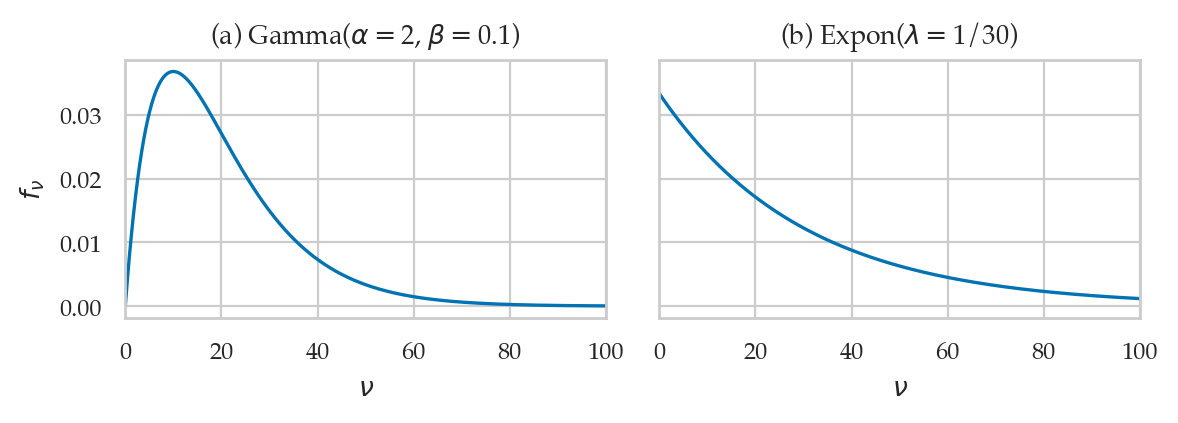

In [69]:
# FIGURES ONLY
from scipy.stats import gamma
from scipy.stats import expon
from ministats import plot_pdf

with plt.rc_context({"figure.figsize":(6,2.2)}):
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

    # PLOT 1
    alpha, beta = 2, 0.1
    rv_nu = gamma(a=2, scale=1/beta)
    plot_pdf(rv_nu, rv_name="ν", ax=ax1)
    ax1.set_title(f'(a) Gamma($\\alpha=${alpha}, $\\beta=${beta})')
    ax1.set_xlim(0, 100)

    # PLOT 2
    scale = 30
    rv_nu_exp = expon(scale=scale)
    plot_pdf(rv_nu_exp, rv_name="ν", ax=ax2)
    ax2.set_title(f'(b) Expon($\\lambda=$1/{scale})')
    ax2.set_xlim(0, 100)

    filename = os.path.join(DESTDIR, "gamma_and_exp_examples.pdf")
    savefigure(fig, filename)

### Example 1: comparing electricity prices

In [70]:
eprices = pd.read_csv("../datasets/eprices.csv")

In [71]:
formula1 = bmb.Formula("price ~ 0 + loc",
                       "sigma ~ 0 + loc")

links1 = {"mu":"identity",
          "sigma":"log"}

priors1 = {
    "loc": bmb.Prior("Normal", mu=8, sigma=5),
    "sigma": {
        "loc": bmb.Prior("Normal", mu=0, sigma=1)
    },
    "nu": bmb.Prior("Gamma", alpha=2, beta=0.1),
}

mod1 = bmb.Model(formula=formula1,
                 family="t",
                 link=links1,
                 priors=priors1,
                 data=eprices)

In [72]:
mod1.build()
filename = os.path.join(DESTDIR, "example1_eprices_mod1_graph")
mod1.graph(name=filename, fmt="png", dpi=300)

In [73]:
idata1 = mod1.fit(random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, loc, sigma_loc]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [74]:
post1 = idata1["posterior"]

# Calculate sigmas from log-sigmas
#######################################################
logsig_W = post1["sigma_loc"].sel(sigma_loc_dim="West")
logsig_E = post1["sigma_loc"].sel(sigma_loc_dim="East")
post1["sigma_West"] = np.exp(logsig_W)
post1["sigma_East"] = np.exp(logsig_E)

# Calculate the difference between between means
post1["mu_West"] = post1["loc"].sel(loc_dim="West")
post1["mu_East"] = post1["loc"].sel(loc_dim="East")
post1["dmeans"] = post1["mu_West"] - post1["mu_East"]

# Calculate the difference between standard deviations
post1["dsigmas"] = post1["sigma_West"]-post1["sigma_East"]

# Effect size
#######################################################
pvar =(post1["sigma_West"]**2+post1["sigma_East"]**2)/2
post1["cohend"] = post1["dmeans"] / np.sqrt(pvar)

Saved figure to figures/bayes/dmeans/example1_dmeans_plots.pdf
Saved figure to figures/bayes/dmeans/example1_dmeans_plots.png


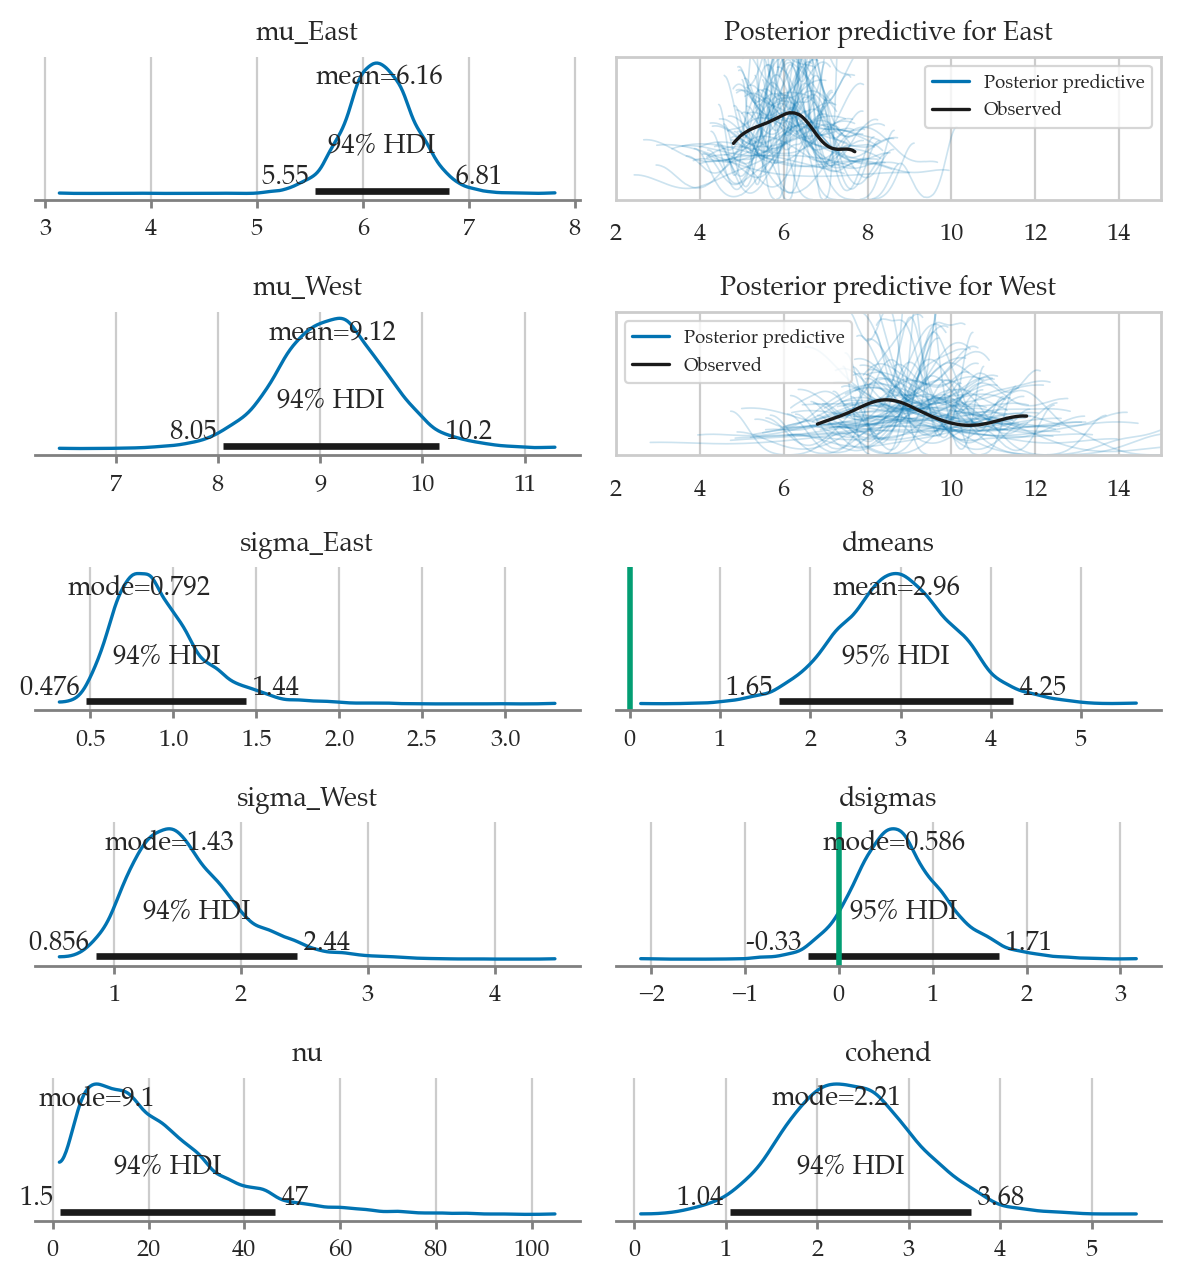

In [75]:
from ministats import plot_dmeans_stats
plot_dmeans_stats(mod1, idata1, group_name="loc",
                  figsize=(6,6.5), ppc_xlims=[2,15], ppc_ylims=[0,0.7]);
filename = os.path.join(DESTDIR, "example1_dmeans_plots.pdf")
savefigure(plt.gcf(), filename)

### Example 2: comparing IQ scores

In [76]:
iqs2 = pd.read_csv("../datasets/iqs2.csv")

In [77]:
with plt.rc_context({"figure.figsize":(6,2)}):
    ax = sns.stripplot(data=iqs2, x="iq", y="group", hue="group", jitter=0.4, alpha=0.5);
    ax.set_xticks( range(80,130,5) )
    filename = os.path.join(DESTDIR, "example2_iqs2_stripplot.pdf")
    savefigure(ax, filename)

Saved figure to figures/bayes/dmeans/example2_iqs2_stripplot.pdf
Saved figure to figures/bayes/dmeans/example2_iqs2_stripplot.png


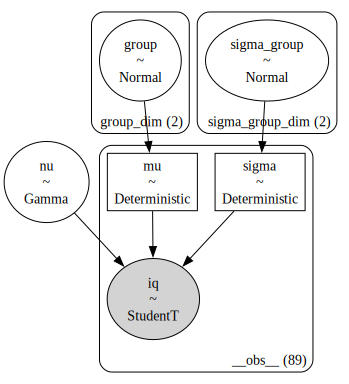

In [78]:
formula2 = bmb.Formula("iq ~ 0 + group",
                       "sigma ~ 0 + group")

priors2 = {
    "group": bmb.Prior("Normal", mu=100, sigma=35),
    "sigma": {
        "group": bmb.Prior("Normal", mu=1, sigma=2)
    },
    "nu": bmb.Prior("Gamma", alpha=2, beta=0.1),
}


mod2 = bmb.Model(formula=formula2,
                 family="t",
                 # link={"mu":"identity", "sigma":"log"}, # Bambi defaults
                 priors=priors2,
                 data=iqs2)

mod2.build()
filename = os.path.join(DESTDIR, "example2_iqs_mod2_graph")
mod2.graph(name=filename, fmt="png", dpi=300)

In [79]:
idata2 = mod2.fit(random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, group, sigma_group]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [80]:
from ministats import calc_dmeans_stats
calc_dmeans_stats(idata2, group_name="group");

Saved figure to figures/bayes/dmeans/example2_dmeans_plots.pdf
Saved figure to figures/bayes/dmeans/example2_dmeans_plots.png


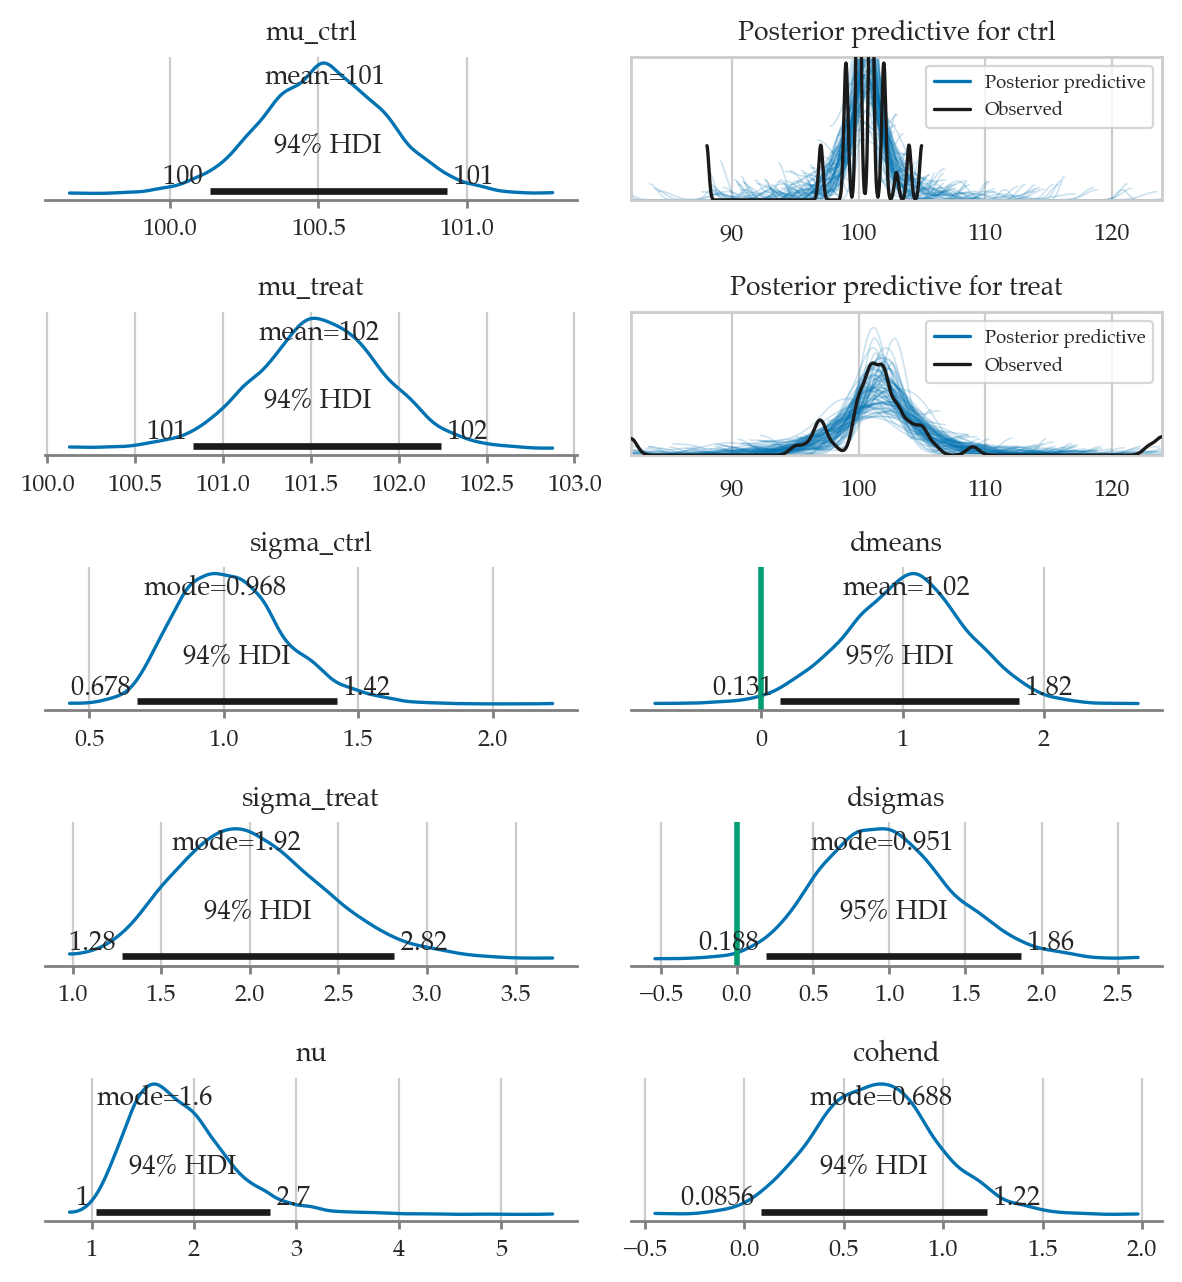

In [81]:
from ministats import plot_dmeans_stats
plot_dmeans_stats(mod2, idata2, group_name="group",
                  figsize=(6,6.5), ppc_xlims=[82,124], ppc_ylims=[0,0.3]);
filename = os.path.join(DESTDIR, "example2_dmeans_plots.pdf")
savefigure(plt.gcf(), filename)

#### Sensitivity analysis

In [82]:
from ministats.book.tables import sens_analysis_dmeans_iqs2
results = sens_analysis_dmeans_iqs2(iqs2)
results

M_prior      logSigma_prior                Nu_prior  \
0  $\mathcal{N}(100,35)$  $\mathcal{N}(1,2)$         $\Gamma(2,0.1)$   
1  $\mathcal{N}(100,50)$  $\mathcal{N}(1,2)$         $\Gamma(2,0.1)$   
2  $\mathcal{N}(100,10)$  $\mathcal{N}(1,2)$         $\Gamma(2,0.1)$   
3  $\mathcal{N}(100,35)$  $\mathcal{N}(0,1)$         $\Gamma(2,0.1)$   
4  $\mathcal{N}(100,35)$  $\mathcal{N}(1,2)$  $\textrm{Expon}(1/30)$   

  dmeans_mean    dmeans_95hdi dsigmas_mode   dsigmas_95hdi nu_mode  \
0       1.033  [0.141, 1.843]        0.887   [0.19, 1.868]   1.633   
1       1.021  [0.195, 1.888]        0.927  [0.186, 1.868]   1.627   
2       1.028  [0.201, 1.911]        0.876  [0.175, 1.821]   1.634   
3        1.02  [0.208, 1.855]        0.851  [0.184, 1.783]   1.596   
4       1.033  [0.192, 1.855]        0.917  [0.175, 1.803]   1.587   

  codhend_mode  
0        0.887  
1        0.927  
2        0.876  
3        0.851  
4        0.917

In [83]:
display_cols = ['M_prior', 'logSigma_prior', 'Nu_prior', 'dmeans_mean', 'dmeans_95hdi', 'dsigmas_mode', 'nu_mode']
with pd.option_context('styler.format.precision', 3):
    print(results[display_cols].to_latex(index=False))

\begin{tabular}{lllllll}
\toprule
M_prior & logSigma_prior & Nu_prior & dmeans_mean & dmeans_95hdi & dsigmas_mode & nu_mode \\
\midrule
$\mathcal{N}(100,35)$ & $\mathcal{N}(1,2)$ & $\Gamma(2,0.1)$ & 1.033 & [np.float64(0.141), np.float64(1.843)] & 0.887 & 1.633 \\
$\mathcal{N}(100,50)$ & $\mathcal{N}(1,2)$ & $\Gamma(2,0.1)$ & 1.021 & [np.float64(0.195), np.float64(1.888)] & 0.927 & 1.627 \\
$\mathcal{N}(100,10)$ & $\mathcal{N}(1,2)$ & $\Gamma(2,0.1)$ & 1.028 & [np.float64(0.201), np.float64(1.911)] & 0.876 & 1.634 \\
$\mathcal{N}(100,35)$ & $\mathcal{N}(0,1)$ & $\Gamma(2,0.1)$ & 1.020 & [np.float64(0.208), np.float64(1.855)] & 0.851 & 1.596 \\
$\mathcal{N}(100,35)$ & $\mathcal{N}(1,2)$ & $\textrm{Expon}(1/30)$ & 1.033 & [np.float64(0.192), np.float64(1.855)] & 0.917 & 1.587 \\
\bottomrule
\end{tabular}



### Performance analysis

In [84]:
from ministats.book.tables import calc_dmeans_perf_metrics
results = calc_dmeans_perf_metrics(reps=100)
results.head()

Simulating a total of 60 dataset specs
loaded cached results from  simdata/dmeans_perf_metrics__ns_20_30_50_100__Deltas_0_0.2_0.5_0.8_1.3__outs_no_few_lots__reps_100.csv


n  Delta outliers  seed  count_reject  \
spec model                                                  
0    perm          20    0.0       no    45             6   
     welch         20    0.0       no    45             6   
     norm_bayes    20    0.0       no    45             2   
     robust_bayes  20    0.0       no    45             7   
     bf            20    0.0       no    45             2   

                   count_fail_to_reject  count_captured  avg_width  
spec model                                                          
0    perm                            94            90.0   1.011714  
     welch                           94            90.0   1.065525  
     norm_bayes                      98            94.0   1.294730  
     robust_bayes                    93            91.0   1.079160  
     bf                              98             NaN        NaN

In [85]:
from ministats.book.tables import get_perf_table_typeI

tableA = get_perf_table_typeI(results)
tableA
# print(tableA.to_latex(float_format="%.2f"))

model         perm  welch  norm_bayes  robust_bayes    bf
outliers n                                               
no       20   0.06   0.06        0.02          0.07  0.02
         30   0.04   0.04        0.03          0.04  0.03
         50   0.04   0.04        0.01          0.04  0.01
         100  0.06   0.06        0.03          0.05  0.01
few      20   0.04   0.04        0.01          0.05  0.01
         30   0.04   0.04        0.01          0.05  0.00
         50   0.03   0.03        0.02          0.01  0.00
         100  0.07   0.07        0.06          0.08  0.03
lots     20   0.04   0.02        0.01          0.03  0.01
         30   0.02   0.02        0.00          0.02  0.00
         50   0.07   0.06        0.06          0.07  0.04
         100  0.03   0.03        0.03          0.02  0.00

In [86]:
from ministats.book.tables import get_perf_table_power

tableB = get_perf_table_power(results, show_all=False)
tableB
# tableB_str = tableB.to_latex(float_format="%.2f")
# print(tableB_str.replace("0.500000", "0.5").replace("0.800000","0.8"))

model               perm  welch  norm_bayes  robust_bayes    bf
outliers Delta n                                               
no       0.5   30   0.46   0.46        0.33          0.46  0.31
               50   0.68   0.69        0.54          0.66  0.50
               100  0.93   0.93        0.90          0.93  0.84
         0.8   20   0.60   0.60        0.44          0.59  0.49
               30   0.86   0.86        0.77          0.86  0.72
               50   0.99   0.99        0.96          0.99  0.93
few      0.5   30   0.49   0.49        0.32          0.45  0.29
               50   0.49   0.51        0.39          0.58  0.33
               100  0.80   0.80        0.80          0.88  0.69
         0.8   20   0.69   0.68        0.51          0.65  0.54
               30   0.88   0.88        0.79          0.87  0.78
               50   0.85   0.85        0.83          0.94  0.75
lots     0.5   30   0.33   0.32        0.29          0.43  0.20
               50   0.52   0.52        0.50          0.63  0.33
               100  0.64   0.63        0.60          0.88  0.52
         0.8   20   0.44   0.43        0.37          0.63  0.30
               30   0.60   0.59        0.57          0.81  0.48
               50   0.82   0.83        0.79          0.97  0.66

In [87]:
from ministats.book.tables import get_perf_table_coverage

tableC = get_perf_table_coverage(results)
tableC
# print(tableC.to_latex(float_format="%.2f"))

model            perm              welch           norm_bayes            \
             coverage avg_width coverage avg_width   coverage avg_width   
outliers n                                                                
no       20    0.8800  1.011711   0.9050  1.064862     0.9650  1.298070   
         30    0.9100  0.821001   0.9175  0.849298     0.9625  1.016220   
         50    0.9050  0.651732   0.9100  0.665610     0.9525  0.762513   
         100   0.9025  0.462228   0.9025  0.467091     0.9325  0.517568   
few      20    0.8550  1.002797   0.8675  1.056252     0.9500  1.294572   
         30    0.9175  0.835295   0.9250  0.864310     0.9625  1.022407   
         50    0.8675  0.784709   0.9025  0.802027     0.9350  0.854340   
         100   0.8725  0.554332   0.8975  0.560776     0.9125  0.581300   
lots     20    0.8700  1.442238   0.9025  1.530370     0.9450  1.601472   
         30    0.8550  1.085291   0.8700  1.128444     0.9000  1.197037   
         50    0.8825  0.892523   0.8975  0.913113     0.9175  0.937645   
         100   0.8975  0.679404   0.9025  0.686951     0.9175  0.688840   

model        robust_bayes            
                 coverage avg_width  
outliers n                           
no       20        0.9100  1.078473  
         30        0.9225  0.855460  
         50        0.9100  0.667750  
         100       0.9075  0.467747  
few      20        0.8700  1.069132  
         30        0.9250  0.872108  
         50        0.9075  0.695260  
         100       0.9275  0.487010  
lots     20        0.8975  1.197020  
         30        0.8550  0.926892  
         50        0.9075  0.726270  
         100       0.8950  0.509295

## Section 5.5 — Hierarchical models

In [88]:
DESTDIR = "figures/bayes/hierarchical"

### Radon dataset

In [89]:
radon = pd.read_csv("../datasets/radon.csv")

Saved figure to figures/bayes/hierarchical/sel_counties_scatter_only.pdf
Saved figure to figures/bayes/hierarchical/sel_counties_scatter_only.png


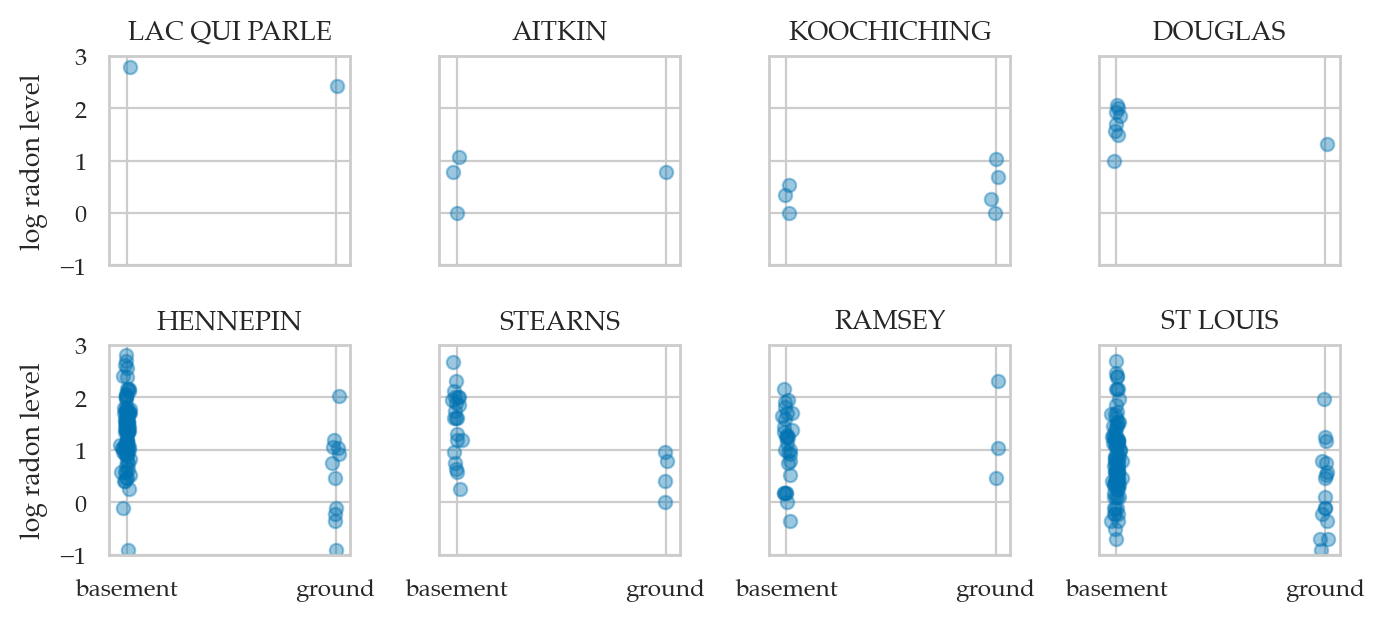

In [90]:
from ministats.book.figures import plot_counties

sel_counties = [
  "LAC QUI PARLE", "AITKIN", "KOOCHICHING", "DOUGLAS",
  "HENNEPIN", "STEARNS", "RAMSEY", "ST LOUIS",
]
fig = plot_counties(radon, counties=sel_counties, figsize=(7,3.2))
filename = os.path.join(DESTDIR, "sel_counties_scatter_only.pdf")
savefigure(fig, filename)

### Example 1: complete pooling model


In [91]:
import bambi as bmb

priors1 = {
    "Intercept": bmb.Prior("Normal", mu=1, sigma=2),
    "floor": bmb.Prior("Normal", mu=0, sigma=5),
    "sigma": bmb.Prior("HalfStudentT", nu=4, sigma=1),
}

mod1 = bmb.Model(formula="log_radon ~ 1 + floor",
                 family="gaussian",
                 link="identity",
                 priors=priors1,
                 data=radon)

mod1.build()
filename = os.path.join(DESTDIR, "example1_complete_pooling_mod1_graph")
mod1.graph(name=filename, fmt="png", dpi=300)

In [92]:
idata1 = mod1.fit(random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, floor]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [93]:
az.plot_posterior(idata1, round_to=2, figsize=(6,1.8));
filename = os.path.join(DESTDIR, "example1_posterior.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/hierarchical/example1_posterior.pdf
Saved figure to figures/bayes/hierarchical/example1_posterior.png


In [94]:
# FIGURES ONLY
fig, axs = bmb.interpret.plot_predictions(mod1, idata1, conditional="floor",
                                          fig_kwargs={"figsize":(3,2)})
means1 = az.summary(idata1, kind="stats")["mean"]
y0 = means1["Intercept"]
y1 = means1["Intercept"] + means1["floor[ground]"]
sns.lineplot(x=[0,1], y=[y0,y1], ax=axs[0]);
midpoint = [0.5, (y0+y1)/2 + 0.03]
slope = means1["floor[ground]"].round(2)
axs[0].annotate("$\\mu_{B_{f}}=%.2f$" % slope, midpoint);
filename = os.path.join(DESTDIR, "example1_basement_ground_slope.pdf")
savefigure(plt.gcf(), filename)

/Users/ivan/Projects/Minireference/STATSbook/noBSstats/venv/lib/python3.12/site-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
Default computed for conditional variable: floor


Saved figure to figures/bayes/hierarchical/example1_basement_ground_slope.pdf
Saved figure to figures/bayes/hierarchical/example1_basement_ground_slope.png


### Example 2: no pooling model

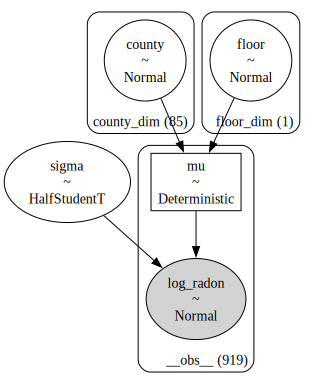

In [95]:
priors2 = {
    "county": bmb.Prior("Normal", mu=1, sigma=2),
    "floor": bmb.Prior("Normal", mu=0, sigma=5),
    "sigma": bmb.Prior("HalfStudentT", nu=4, sigma=1),
}

mod2 = bmb.Model("log_radon ~ 0 + county + floor",
                 family="gaussian",
                 link="identity",
                 priors=priors2,
                 data=radon)
mod2.build()
filename = os.path.join(DESTDIR, "example2_no_pooling_mod2_graph")
mod2.graph(name=filename, fmt="png", dpi=300)

In [96]:
idata2 = mod2.fit(random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, county, floor]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


Saved figure to figures/bayes/hierarchical/forest_plot_mod2_sel_counties.pdf
Saved figure to figures/bayes/hierarchical/forest_plot_mod2_sel_counties.png


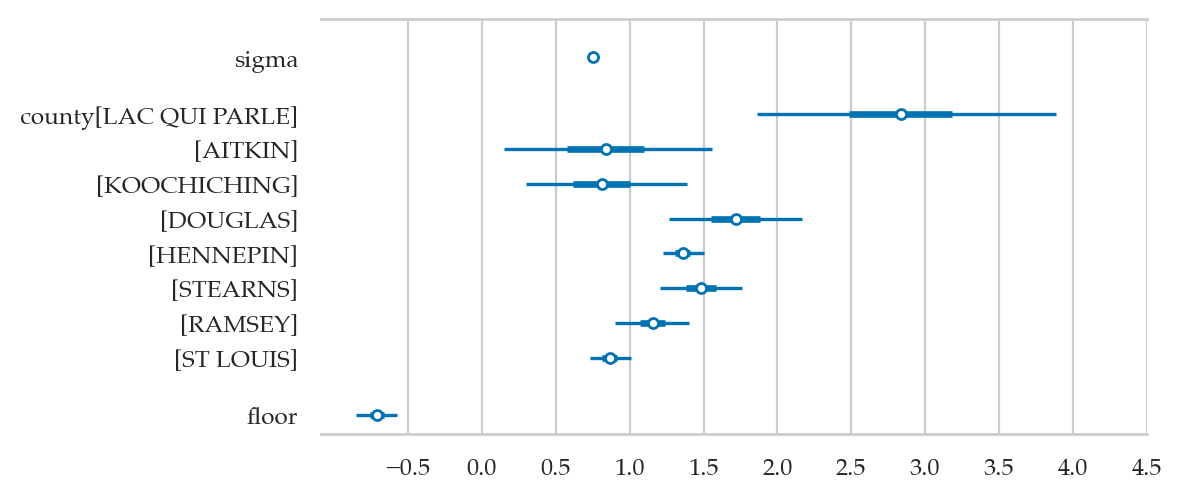

In [97]:
idata2sel = idata2.sel(county_dim=sel_counties)
axs = az.plot_forest(idata2sel, combined=True, figsize=(6,2.6))
axs[0].set_xticks(np.arange(-0.5,4.6,0.5))
axs[0].set_title(None);

filename = os.path.join(DESTDIR, "forest_plot_mod2_sel_counties.pdf")
savefigure(axs[0], filename)

In [98]:
sel_counties = [
  "LAC QUI PARLE", "AITKIN", "KOOCHICHING", "DOUGLAS",
  "HENNEPIN", "STEARNS", "RAMSEY", "ST LOUIS",
]
fig = plot_counties(radon, idata_cp=idata1, idata_np=idata2,
                    counties=sel_counties, figsize=(7,3.2))
filename = os.path.join(DESTDIR, "sel_counties_complete_and_no_pooling.pdf")
savefigure(fig, filename)

Saved figure to figures/bayes/hierarchical/sel_counties_complete_and_no_pooling.pdf
Saved figure to figures/bayes/hierarchical/sel_counties_complete_and_no_pooling.png


### Example 3: hierarchical model

In [99]:
priors3 = {
    "Intercept": bmb.Prior("Normal", mu=1, sigma=2),
    "floor": bmb.Prior("Normal", mu=0, sigma=5),
    "1|county": bmb.Prior("Normal", mu=0, sigma=bmb.Prior("Exponential", lam=1)),
    "sigma": bmb.Prior("HalfStudentT", nu=4, sigma=1),
}

formula3 = "log_radon ~ 1 + (1|county) + floor"
mod3 = bmb.Model(formula=formula3,
                 family="gaussian",
                 link="identity",
                 priors=priors3,
                 data=radon,
                 noncentered=False)

mod3.build()
filename = os.path.join(DESTDIR, "example3_partial_pooling_mod3_graph")
mod3.graph(name=filename, fmt="png", dpi=300)

In [100]:
idata3 = mod3.fit(random_seed=42)
idata3sel = idata3.sel(county__factor_dim=sel_counties)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, floor, 1|county_sigma, 1|county]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Saved figure to figures/bayes/hierarchical/forest_plot_mod3_sel_counties.pdf
Saved figure to figures/bayes/hierarchical/forest_plot_mod3_sel_counties.png


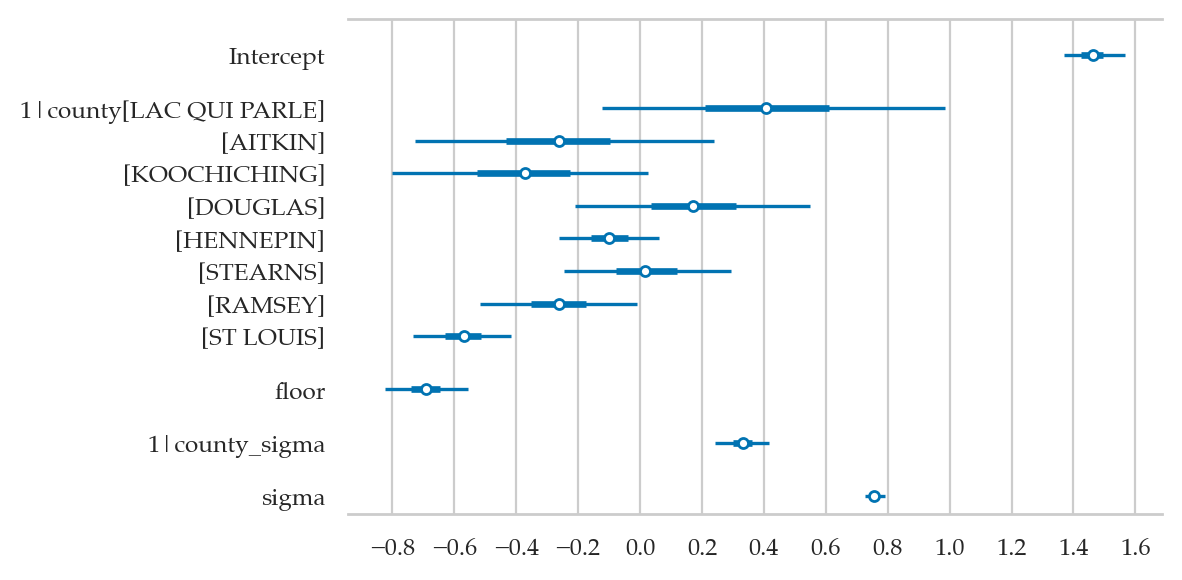

In [101]:
axs = az.plot_forest(idata3sel, var_names=["Intercept", "1|county", "floor", "1|county_sigma", "sigma"], combined=True, figsize=(6,3))
axs[0].set_xticks(np.arange(-0.8,1.6,0.2))
axs[0].set_title(None);

filename = os.path.join(DESTDIR, "forest_plot_mod3_sel_counties.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/hierarchical/sel_counties_all_models.pdf
Saved figure to figures/bayes/hierarchical/sel_counties_all_models.png


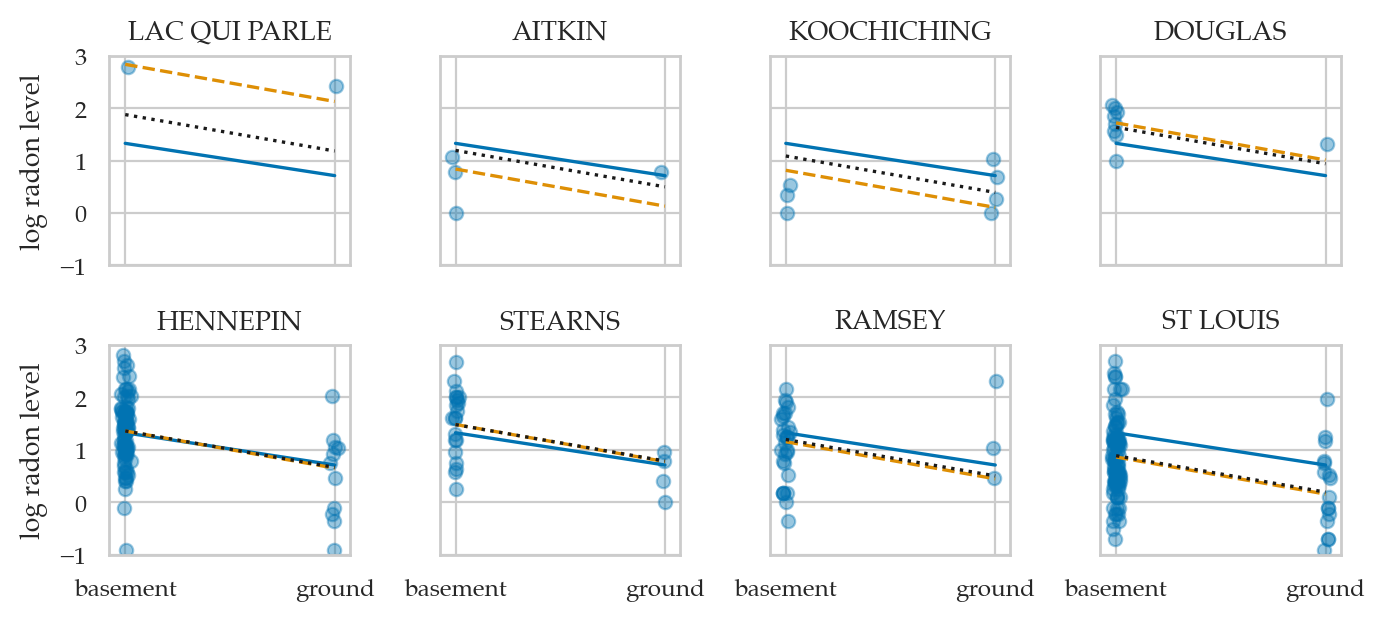

In [102]:
fig = plot_counties(radon, idata_cp=idata1, idata_np=idata2, idata_pp=idata3, figsize=(7,3.2))
filename = os.path.join(DESTDIR, "sel_counties_all_models.pdf")
savefigure(fig, filename)

### Explanations

In [103]:
formula4 = "log_radon ~ 1 + (1|county) + floor + (floor|county)"

SigmaB0j = bmb.Prior("Exponential", lam=1)
SigmaBfj = bmb.Prior("Exponential", lam=1)

priors4 = {
    "Intercept": bmb.Prior("Normal", mu=1, sigma=2),
    "1|county": bmb.Prior("Normal", mu=0, sigma=SigmaB0j),
    "floor": bmb.Prior("Normal", mu=-1, sigma=2),
    "floor|county": bmb.Prior("Normal", mu=0, sigma=SigmaBfj),
    "sigma": bmb.Prior("HalfStudentT", nu=4, sigma=1),
}

mod4 = bmb.Model(formula=formula4,
                 family="gaussian",
                 link="identity",
                 priors=priors4,
                 data=radon,
                 noncentered=False)
mod4.build()
filename = os.path.join(DESTDIR, "varying_int_and_slopes_mod4_graph")
mod4.graph(name=filename, fmt="png", dpi=300)

In [104]:
idata4 = mod4.fit(draws=2000, tune=3000, random_seed=42, target_accept=0.9)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, floor, 1|county_sigma, 1|county, floor|county_sigma, floor|county]


Output()

Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 11 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [105]:
idata4sel = idata4.sel(county__factor_dim=sel_counties)

In [106]:
idata4sel = idata4.sel(county__factor_dim=sel_counties)
var_names = ["Intercept",
             "1|county",
             "floor",
             "floor|county",
             "1|county_sigma",
             "floor|county_sigma",
             "sigma"]
axs = az.plot_forest(idata4sel, combined=True, var_names=var_names, figsize=(6,4))
axs[0].set_xticks(np.arange(-1.6,1.6,0.2))
axs[0].set_title(None);


filename = os.path.join(DESTDIR, "forest_plot_mod4_sel_counties.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/bayes/hierarchical/forest_plot_mod4_sel_counties.pdf
Saved figure to figures/bayes/hierarchical/forest_plot_mod4_sel_counties.png


#### Comparing models

In [107]:
from ministats.utils import loglevel
with loglevel("ERROR", module="pymc"):
    idata1ll = mod1.fit(idata_kwargs={"log_likelihood": True}, random_seed=42, progressbar=False)
    idata2ll = mod2.fit(idata_kwargs={"log_likelihood": True}, random_seed=42, progressbar=False)
    idata3ll = mod3.fit(idata_kwargs={"log_likelihood": True}, random_seed=42, progressbar=False)
    idata4ll = mod4.fit(idata_kwargs={"log_likelihood": True}, random_seed=42, progressbar=False,
                        draws=2000, tune=3000, target_accept=0.9)

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Compare models based on their expected log pointwise predictive density (ELPD).

The ELPD is estimated either by Pareto smoothed importance sampling leave-one-out cross-validation (LOO) or using the widely applicable information criterion (WAIC). We recommend loo. Read more theory here - in a paper by some of the leading authorities on model comparison dx.doi.org/10.1111/1467-9868.00353

/Users/ivan/Projects/Minireference/STATSbook/noBSstats/venv/lib/python3.12/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/ivan/Projects/Minireference/STATSbook/noBSstats/venv/lib/python3.12/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  war

Saved figure to figures/bayes/hierarchical/model_comparison_mod1_mod2_mod3_mod4.pdf
Saved figure to figures/bayes/hierarchical/model_comparison_mod1_mod2_mod3_mod4.png


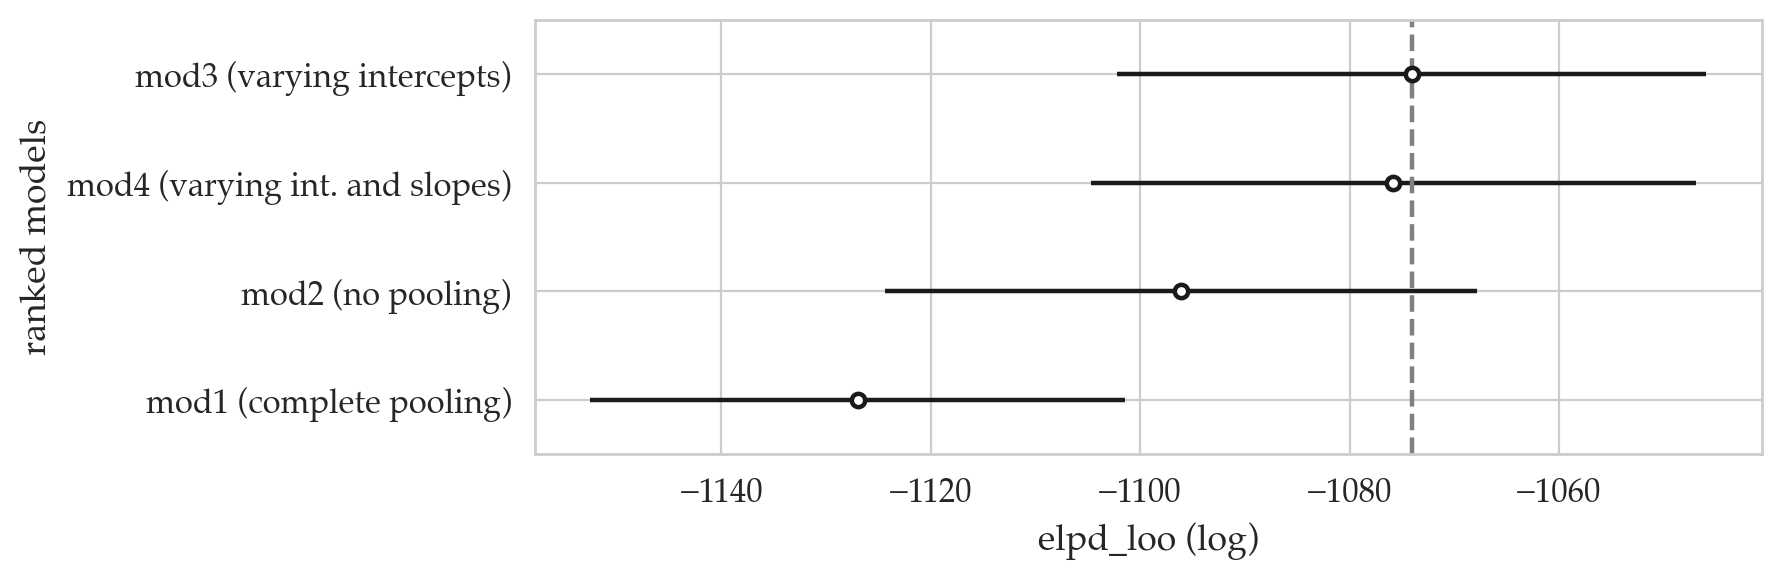

In [108]:
radon_models = {
    "mod1 (complete pooling)": idata1ll,
    "mod2 (no pooling)": idata2ll,
    "mod3 (varying intercepts)": idata3ll,
    "mod4 (varying int. and slopes)": idata4ll,
}
compare_results = az.compare(radon_models)

ax = az.plot_compare(compare_results, figsize=(9,3))
ax.set_title(None)
filename = os.path.join(DESTDIR, "model_comparison_mod1_mod2_mod3_mod4.pdf")
savefigure(ax, filename)